<a href="https://colab.research.google.com/github/ElenaVillano/visualizacionR/blob/main/notebooks/s3-your-own-graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
#install.packages("ggsci")
#install.packages('ggridges')
library("ggsci")
library("ggridges")

In [3]:
indicadores <- read_csv('sample_data/base-bien.csv')

Rows: 78 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): pais
dbl (14): id, sdg-wi, ind-desc-hum, wdl-gob-ind, ind-lib-eco, ind-lib-eco-hf...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
class(indicadores)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [5]:
dim(indicadores)

[1] 78 15

In [6]:
typeof(indicadores)

[1] "list"

In [7]:
head(indicadores)

id,sdg-wi,ind-desc-hum,wdl-gob-ind,ind-lib-eco,ind-lib-eco-hf,voice-account,gover-effect,imi,in-mud-inno,global-know,global-inno,ind-hum-cap,anio,pais
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,NA,0.813,1.16,77.2,69.0,1.10,1.16,3.35,3.35,NA,3.35,0.62636,2010,Chile
2,NA,0.817,1.15,77.4,67.0,1.07,1.15,34.84,34.84,NA,34.84,NA,2011,Chile
3,NA,0.824,1.18,78.3,72.0,1.08,1.18,42.70,42.70,NA,42.70,NA,2012,Chile
4,NA,0.836,1.16,79.0,72.0,1.11,1.16,40.58,40.58,NA,40.58,NA,2013,Chile
5,57.3,0.841,1.04,78.7,72.3,1.06,1.04,40.64,40.64,NA,40.64,NA,2014,Chile
6,67.2,0.846,0.92,78.5,71.0,1.00,0.92,41.20,41.20,NA,41.20,NA,2015,Chile


In [8]:
options(repr.plot.with = 1, repr.plot.height = 5, repr.plot.res=300)

# Prueba diferentes temas

  - theme_gray(): signature ggplot2 theme
  - theme_bw(): dark on light ggplot2 theme
  - theme_linedraw(): uses black lines on white backgrounds only
  - theme_light(): similar to linedraw() but with grey lines as well
  - theme_dark(): lines on a dark background instead of light
  - theme_minimal(): no background annotations, minimal feel
  - theme_classic(): theme with no grid lines
  - theme_void(): empty theme with no elements

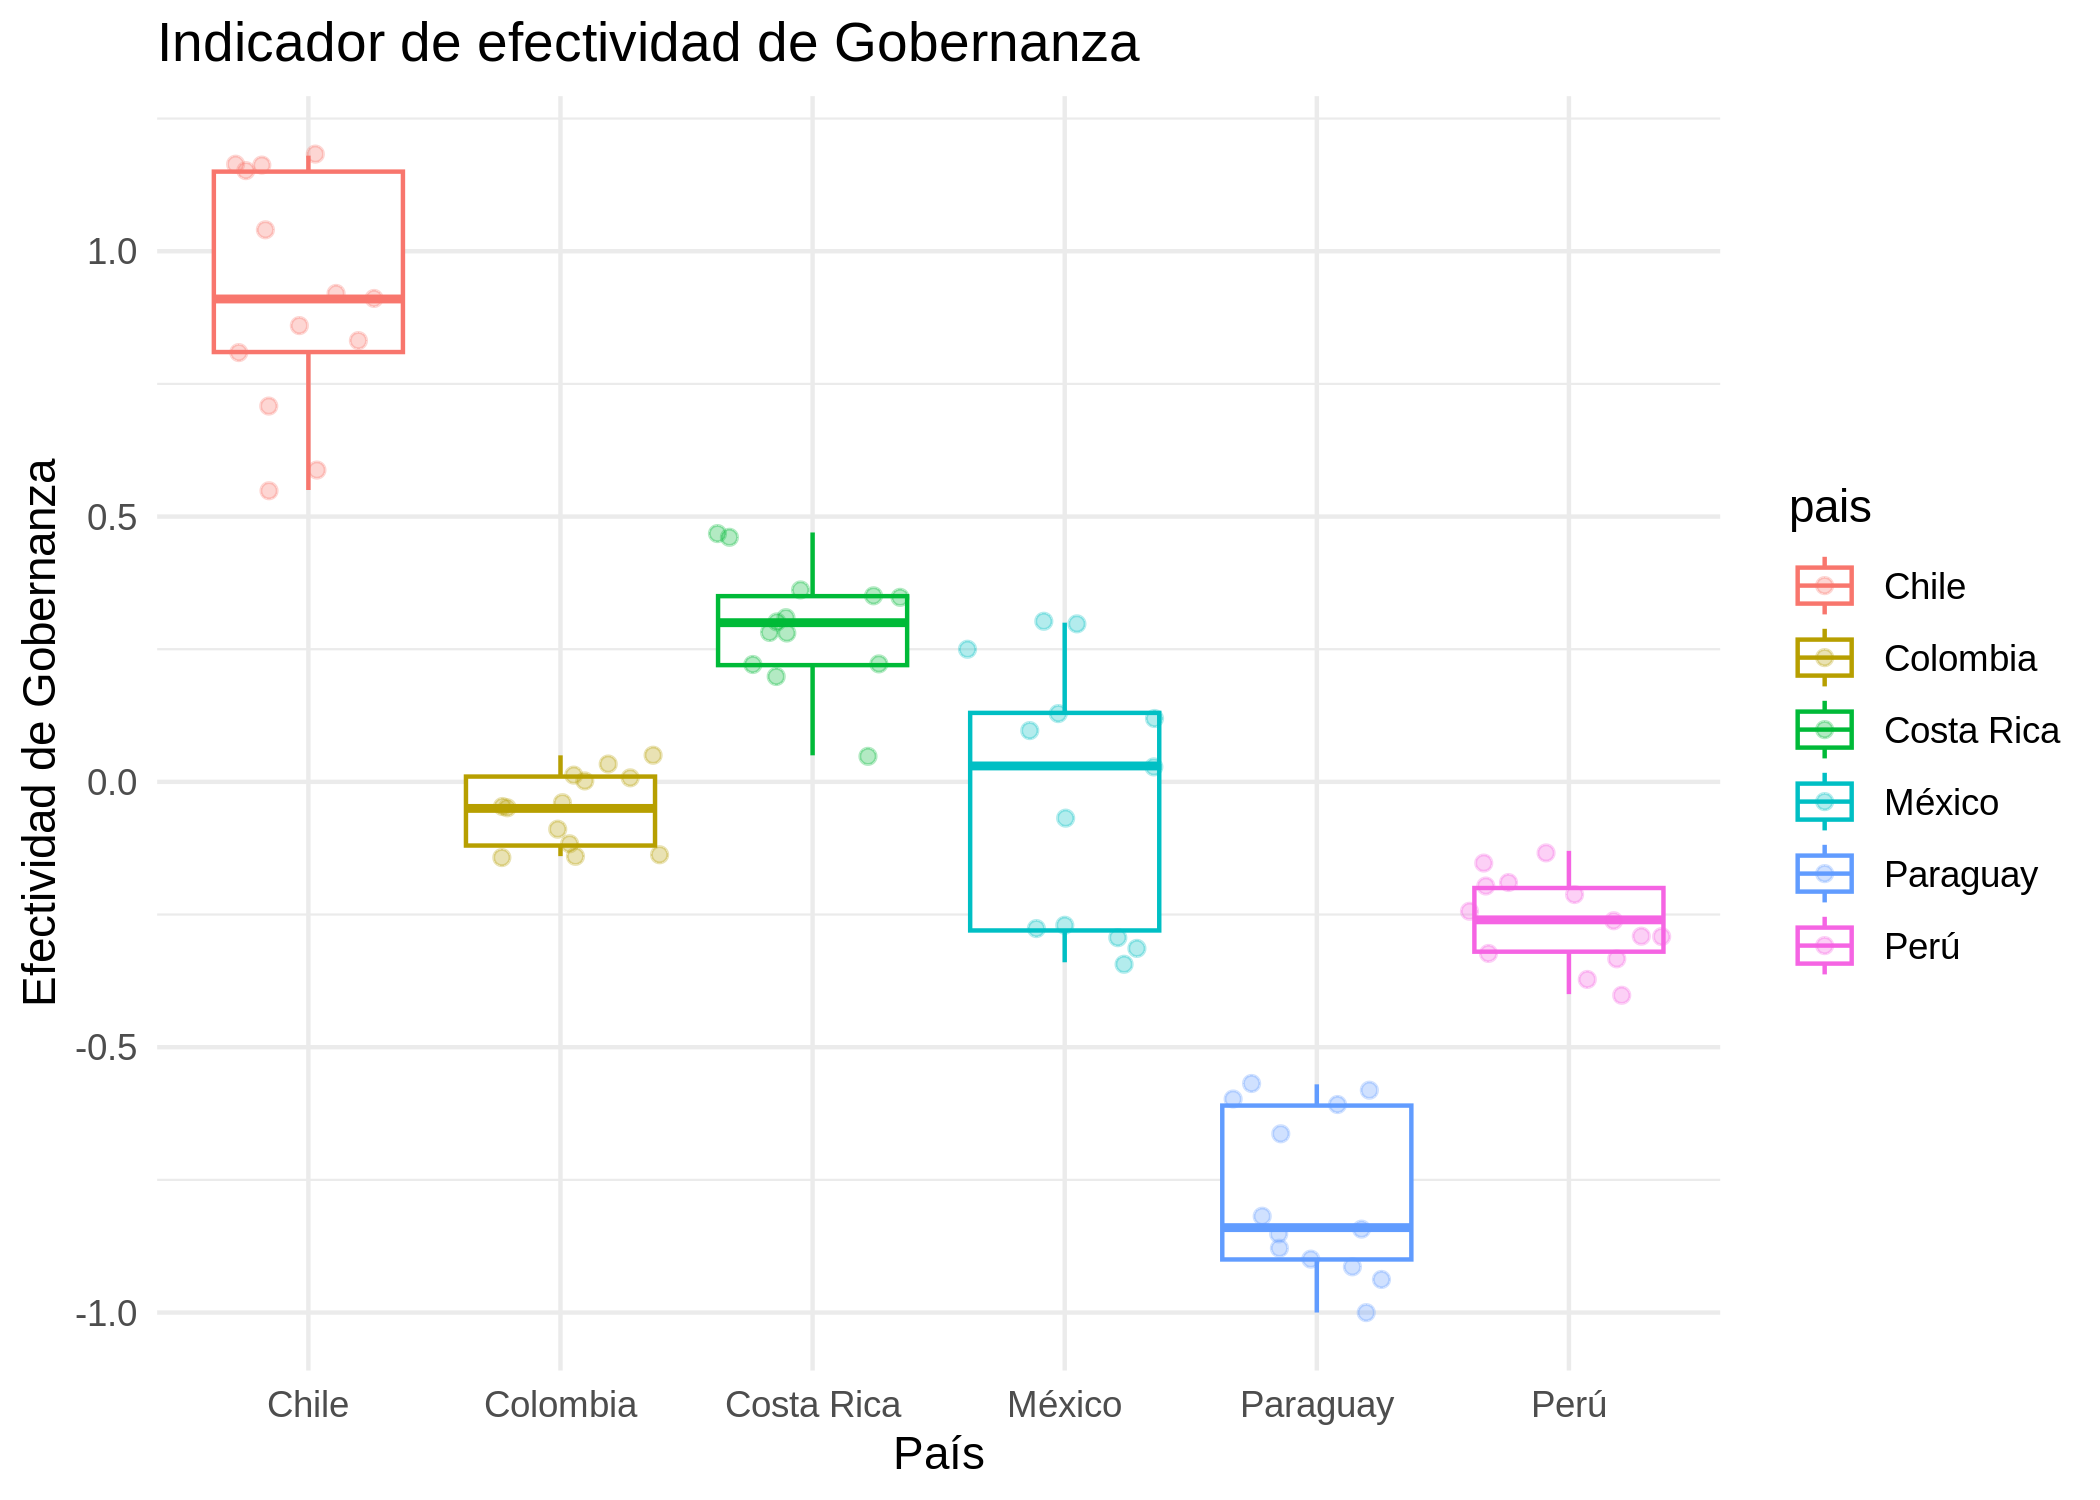

In [91]:
ggplot(data = indicadores, aes(x = pais, y = `gover-effect`, color = pais)) +
  #theme_bw() +
  #theme_classic() +
  #theme_light() +
  theme_minimal() +
  geom_boxplot() +
  geom_jitter(alpha = 0.3) +
  labs(x='País', y='Efectividad de Gobernanza', title = 'Indicador de efectividad de Gobernanza')

In [84]:
plot1 <- ggplot(data = indicadores, aes(x = pais, y = `gover-effect`, color = pais)) +
  theme_light() +
  scale_color_npg() +
  geom_boxplot() +
  geom_jitter(alpha = 0.3) +
  labs(x='País', y='Efectividad de Gobernanza', title = 'Indicador de efectividad de Gobernanza')

#ggsave("plot_1.png", plot1, width = 10, dpi = 300)

png 
  2

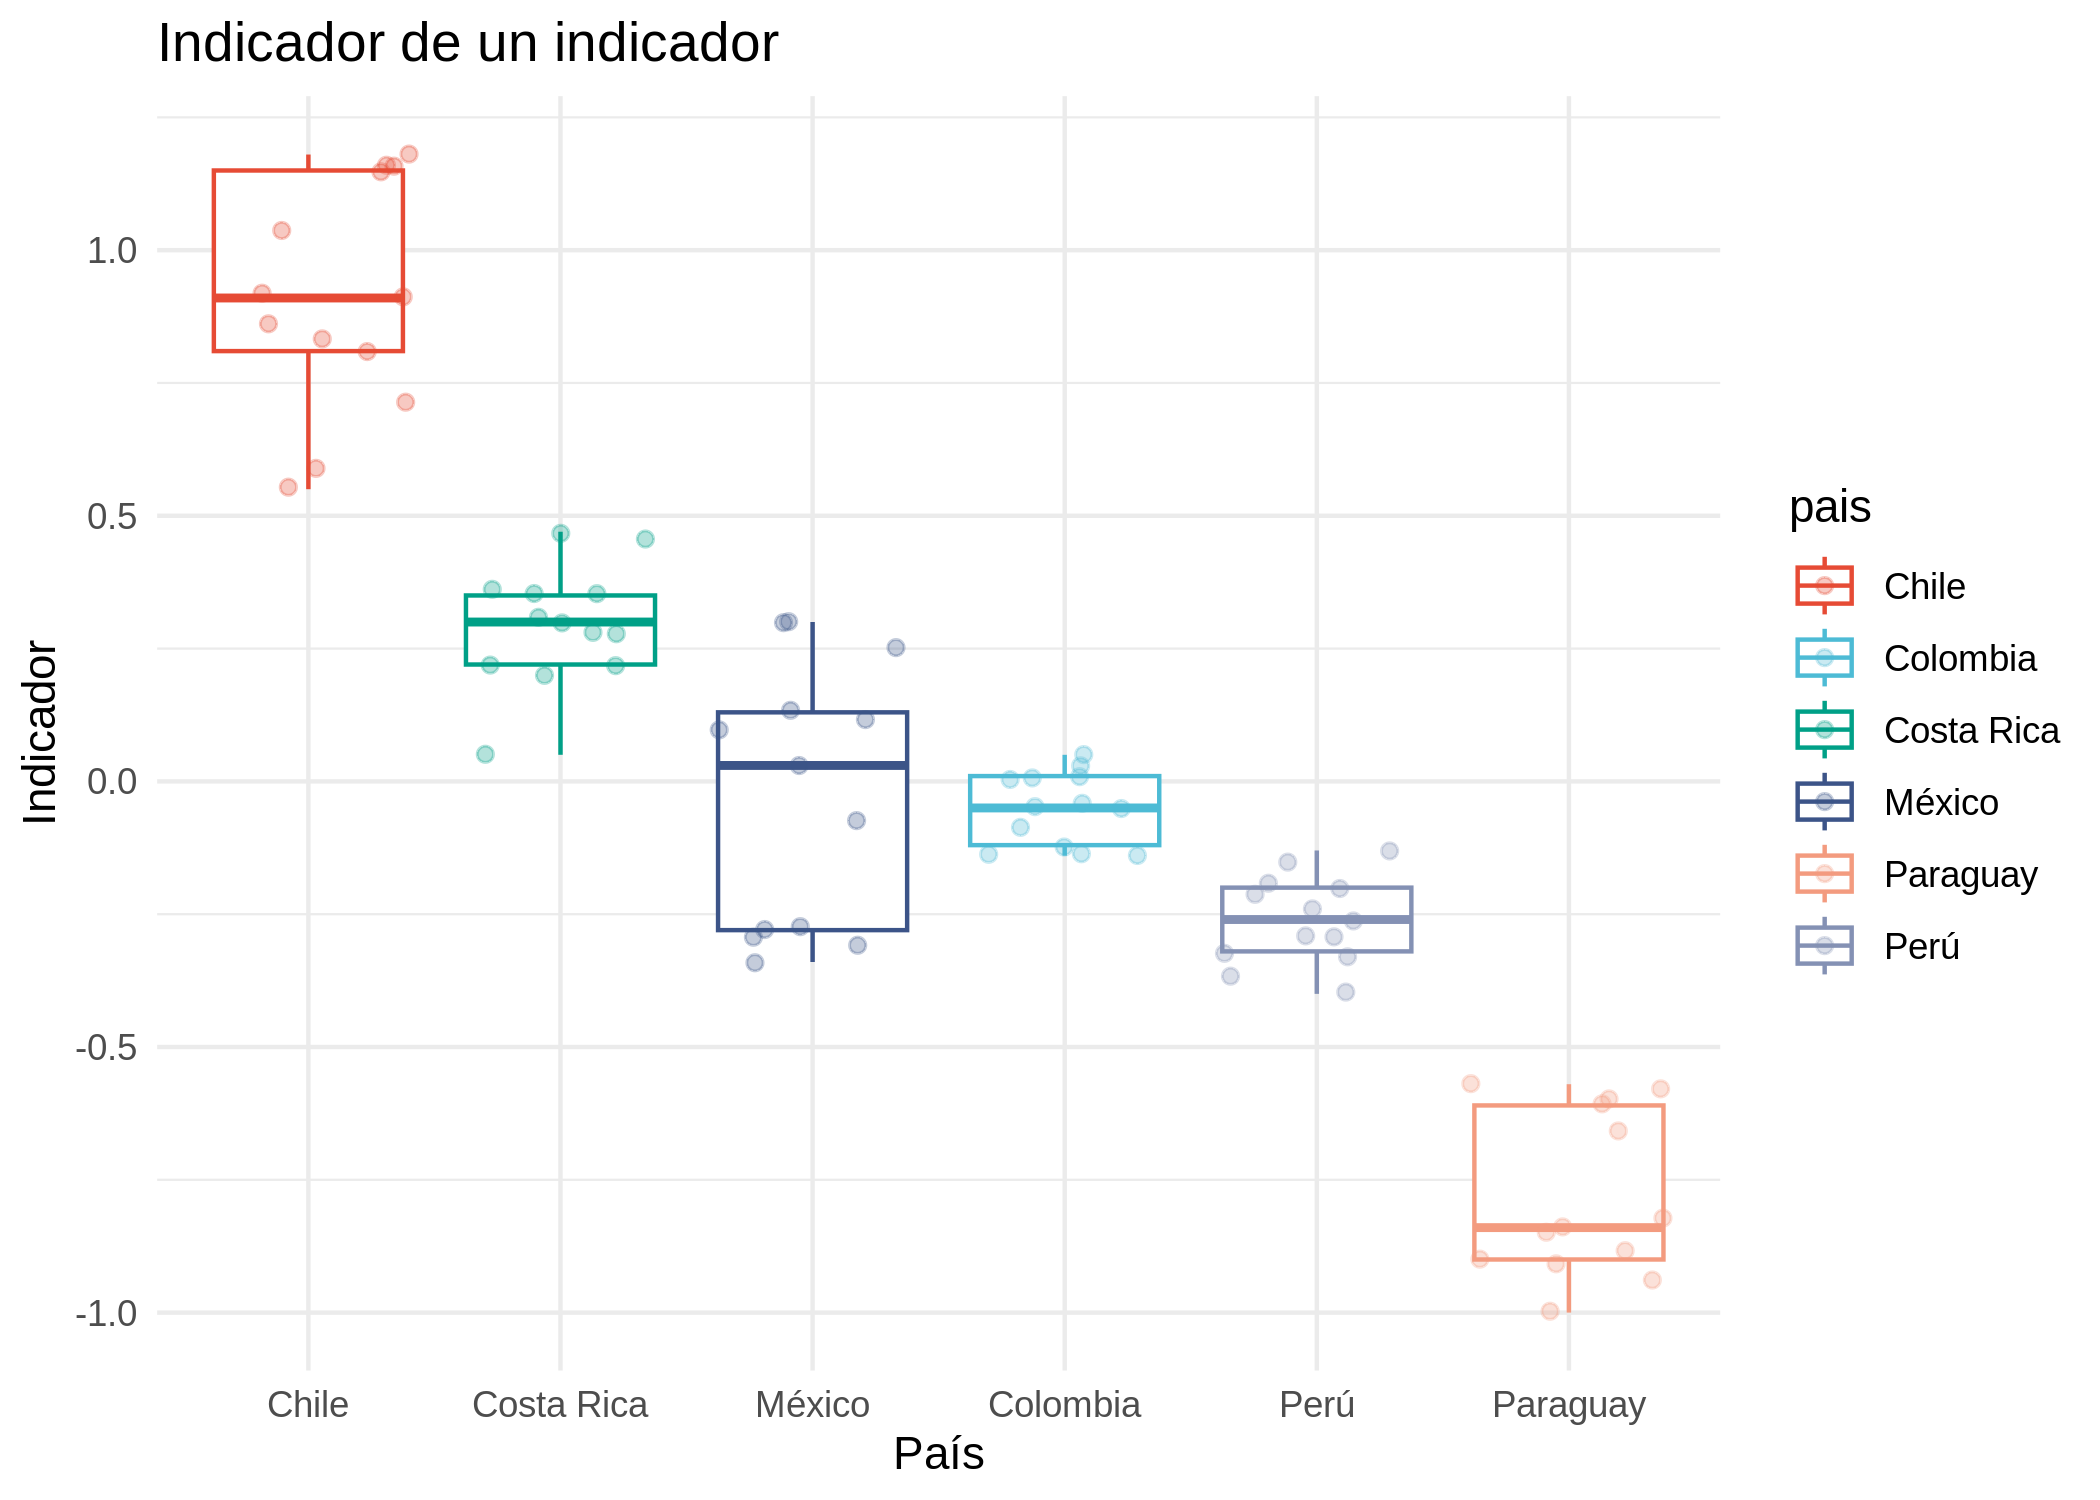

In [110]:
ggplot(data = indicadores, aes(x = reorder(pais,-`gover-effect`), y = `gover-effect`, color = pais)) +
  theme_minimal() +
  scale_color_npg() +
  geom_boxplot() +
  geom_jitter(alpha = 0.3) +
  labs(x='País', y='Indicador', title = 'Indicador de un indicador')

Picking joint bandwidth of 0.0778



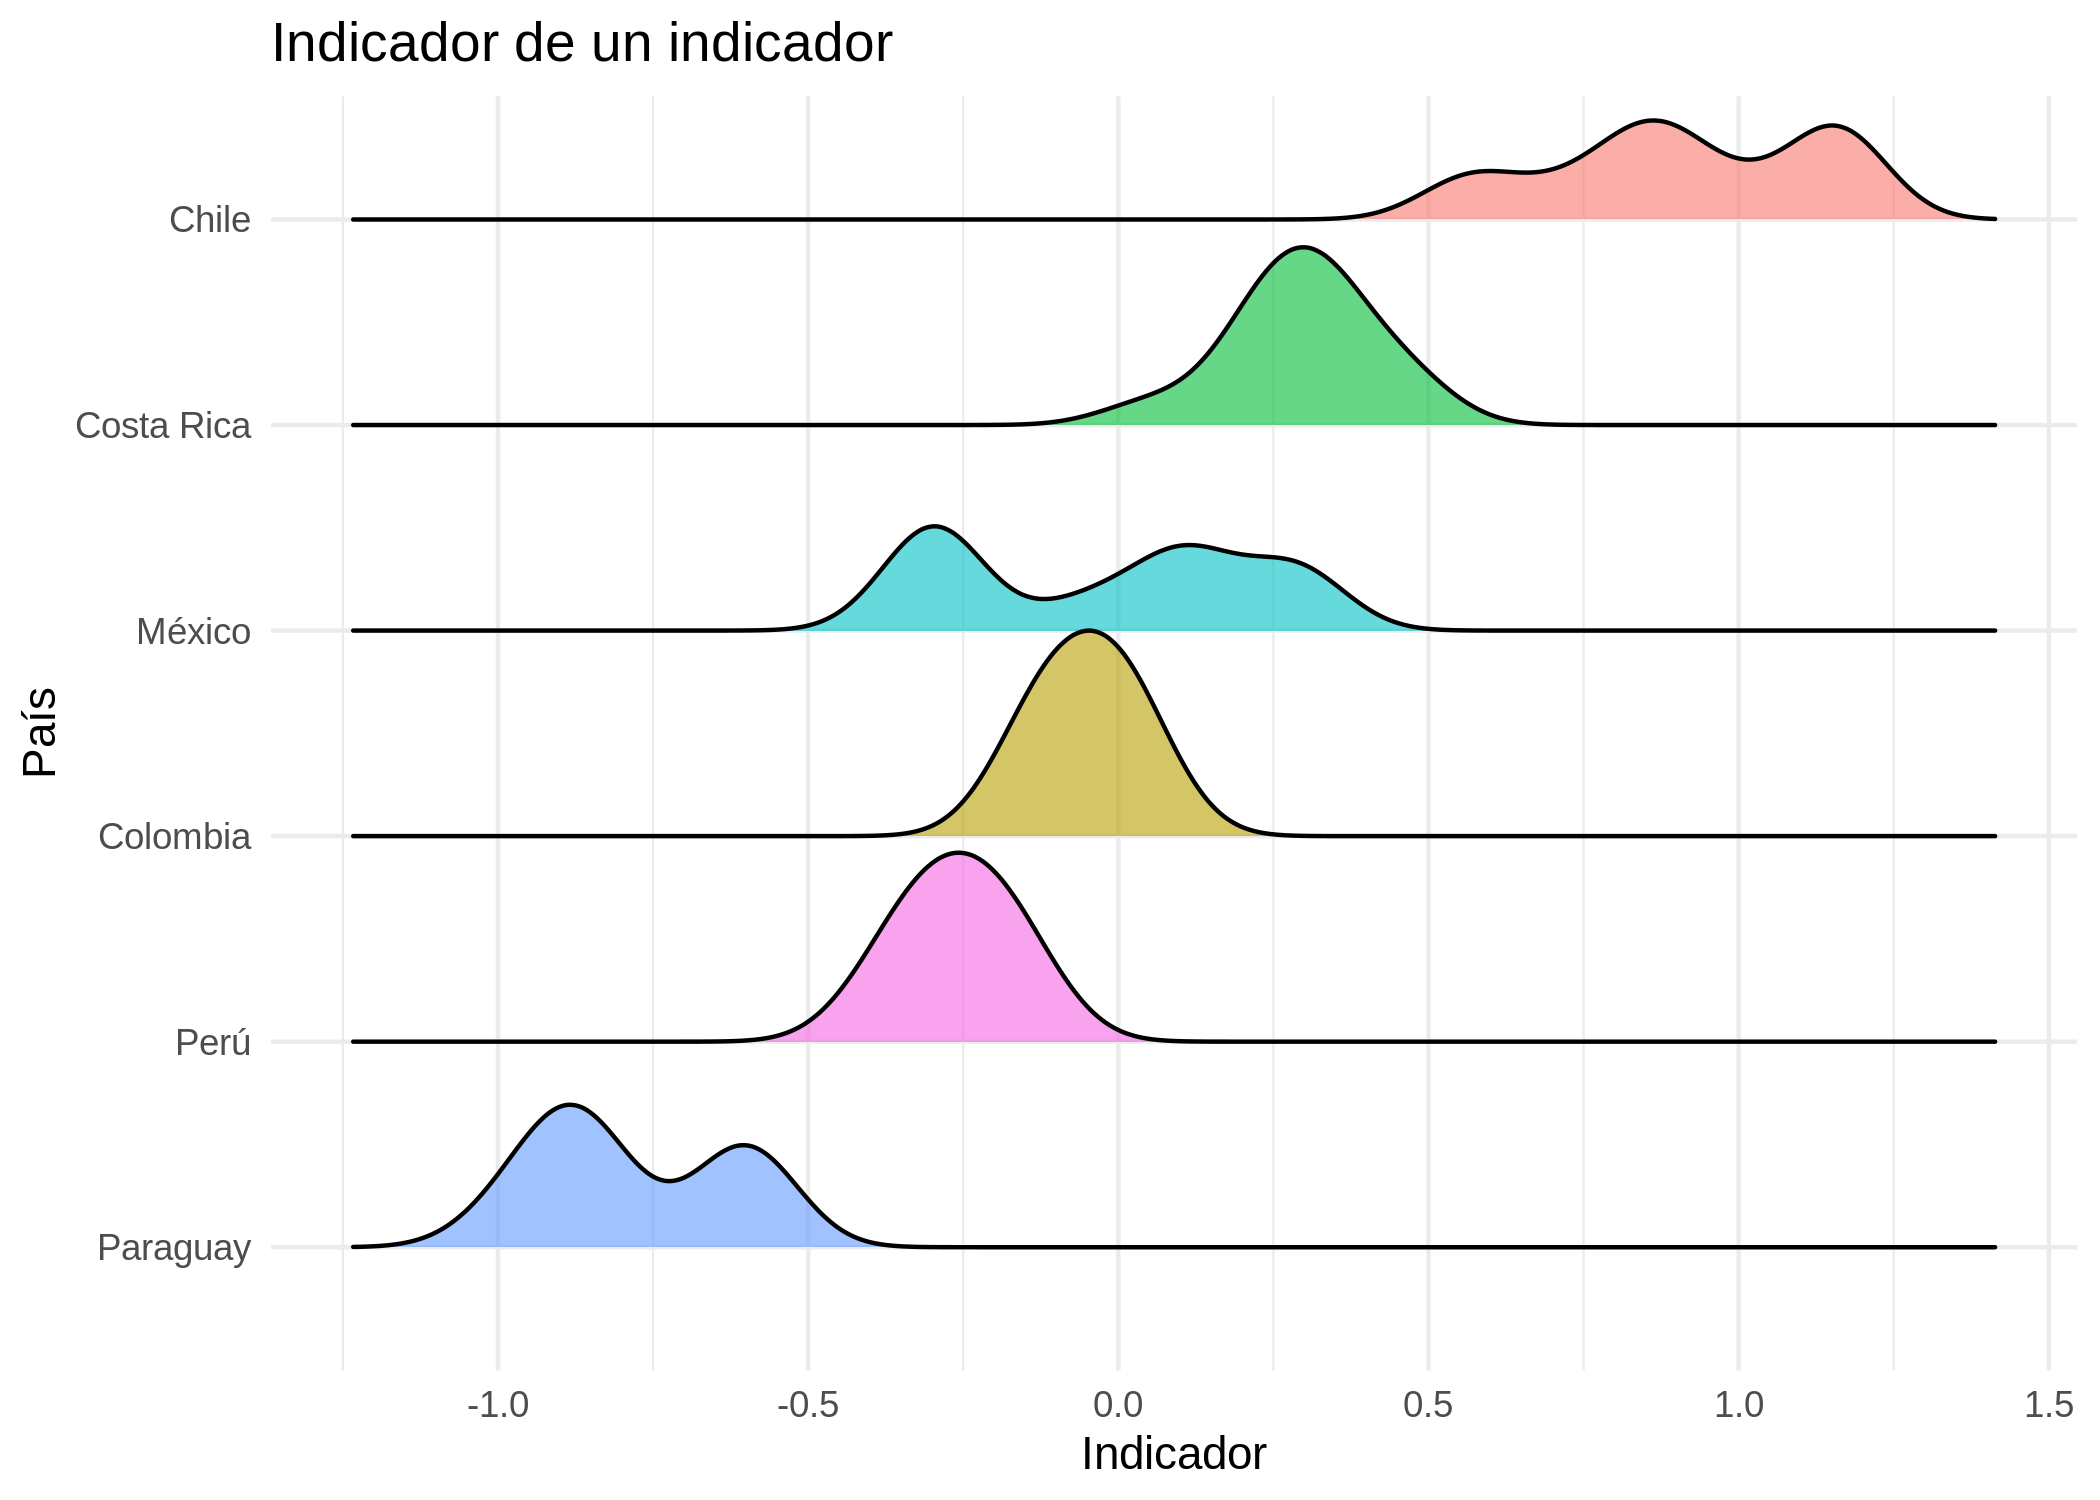

In [133]:
ggplot(indicadores, aes(x = `gover-effect`, y = reorder(pais,`gover-effect`), fill = pais)) +
  geom_density_ridges(alpha=0.6,scale=1) +#, stat="binline", bins=30) +
  scale_color_npg() +
  theme_minimal() +
  theme(legend.position = "none") +
  labs(x='Indicador', y='País', title = 'Indicador de un indicador')

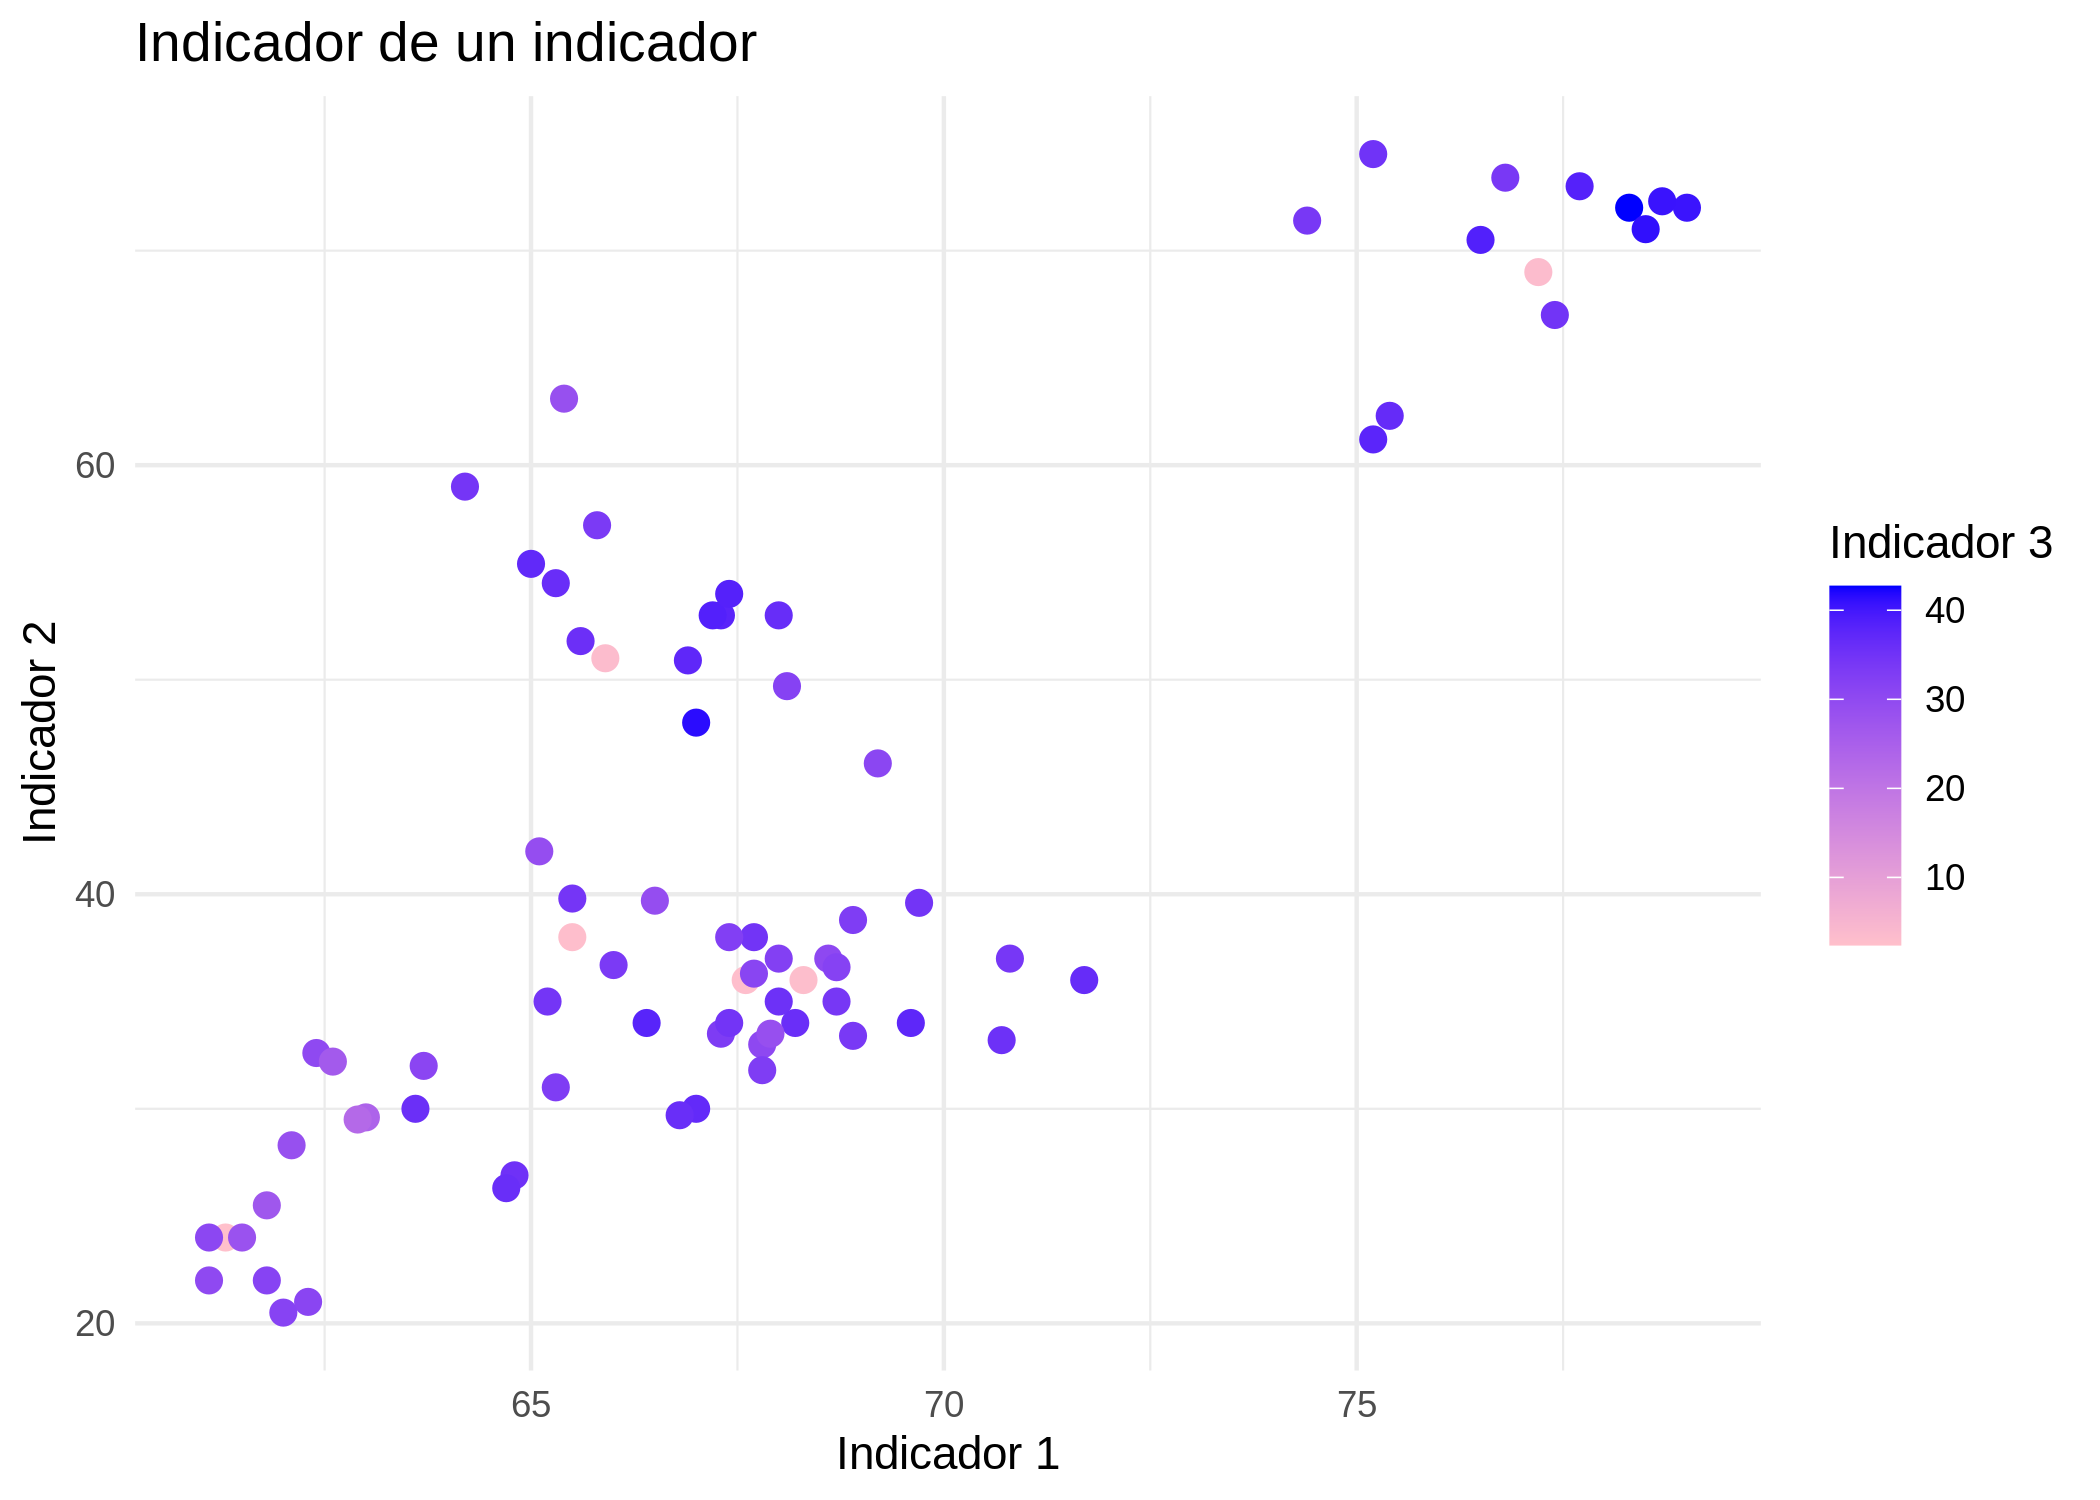

In [179]:
ggplot(data = indicadores, mapping = aes(x = `ind-lib-eco` , y = `ind-lib-eco-hf`, color = imi)) +
  geom_point(size=2.5) +
  theme_minimal() +
  scale_color_gradient(low = "pink", high = "blue", name='Indicador 3')  +
  labs(x='Indicador 1', y='Indicador 2', title = 'Indicador de un indicador' )

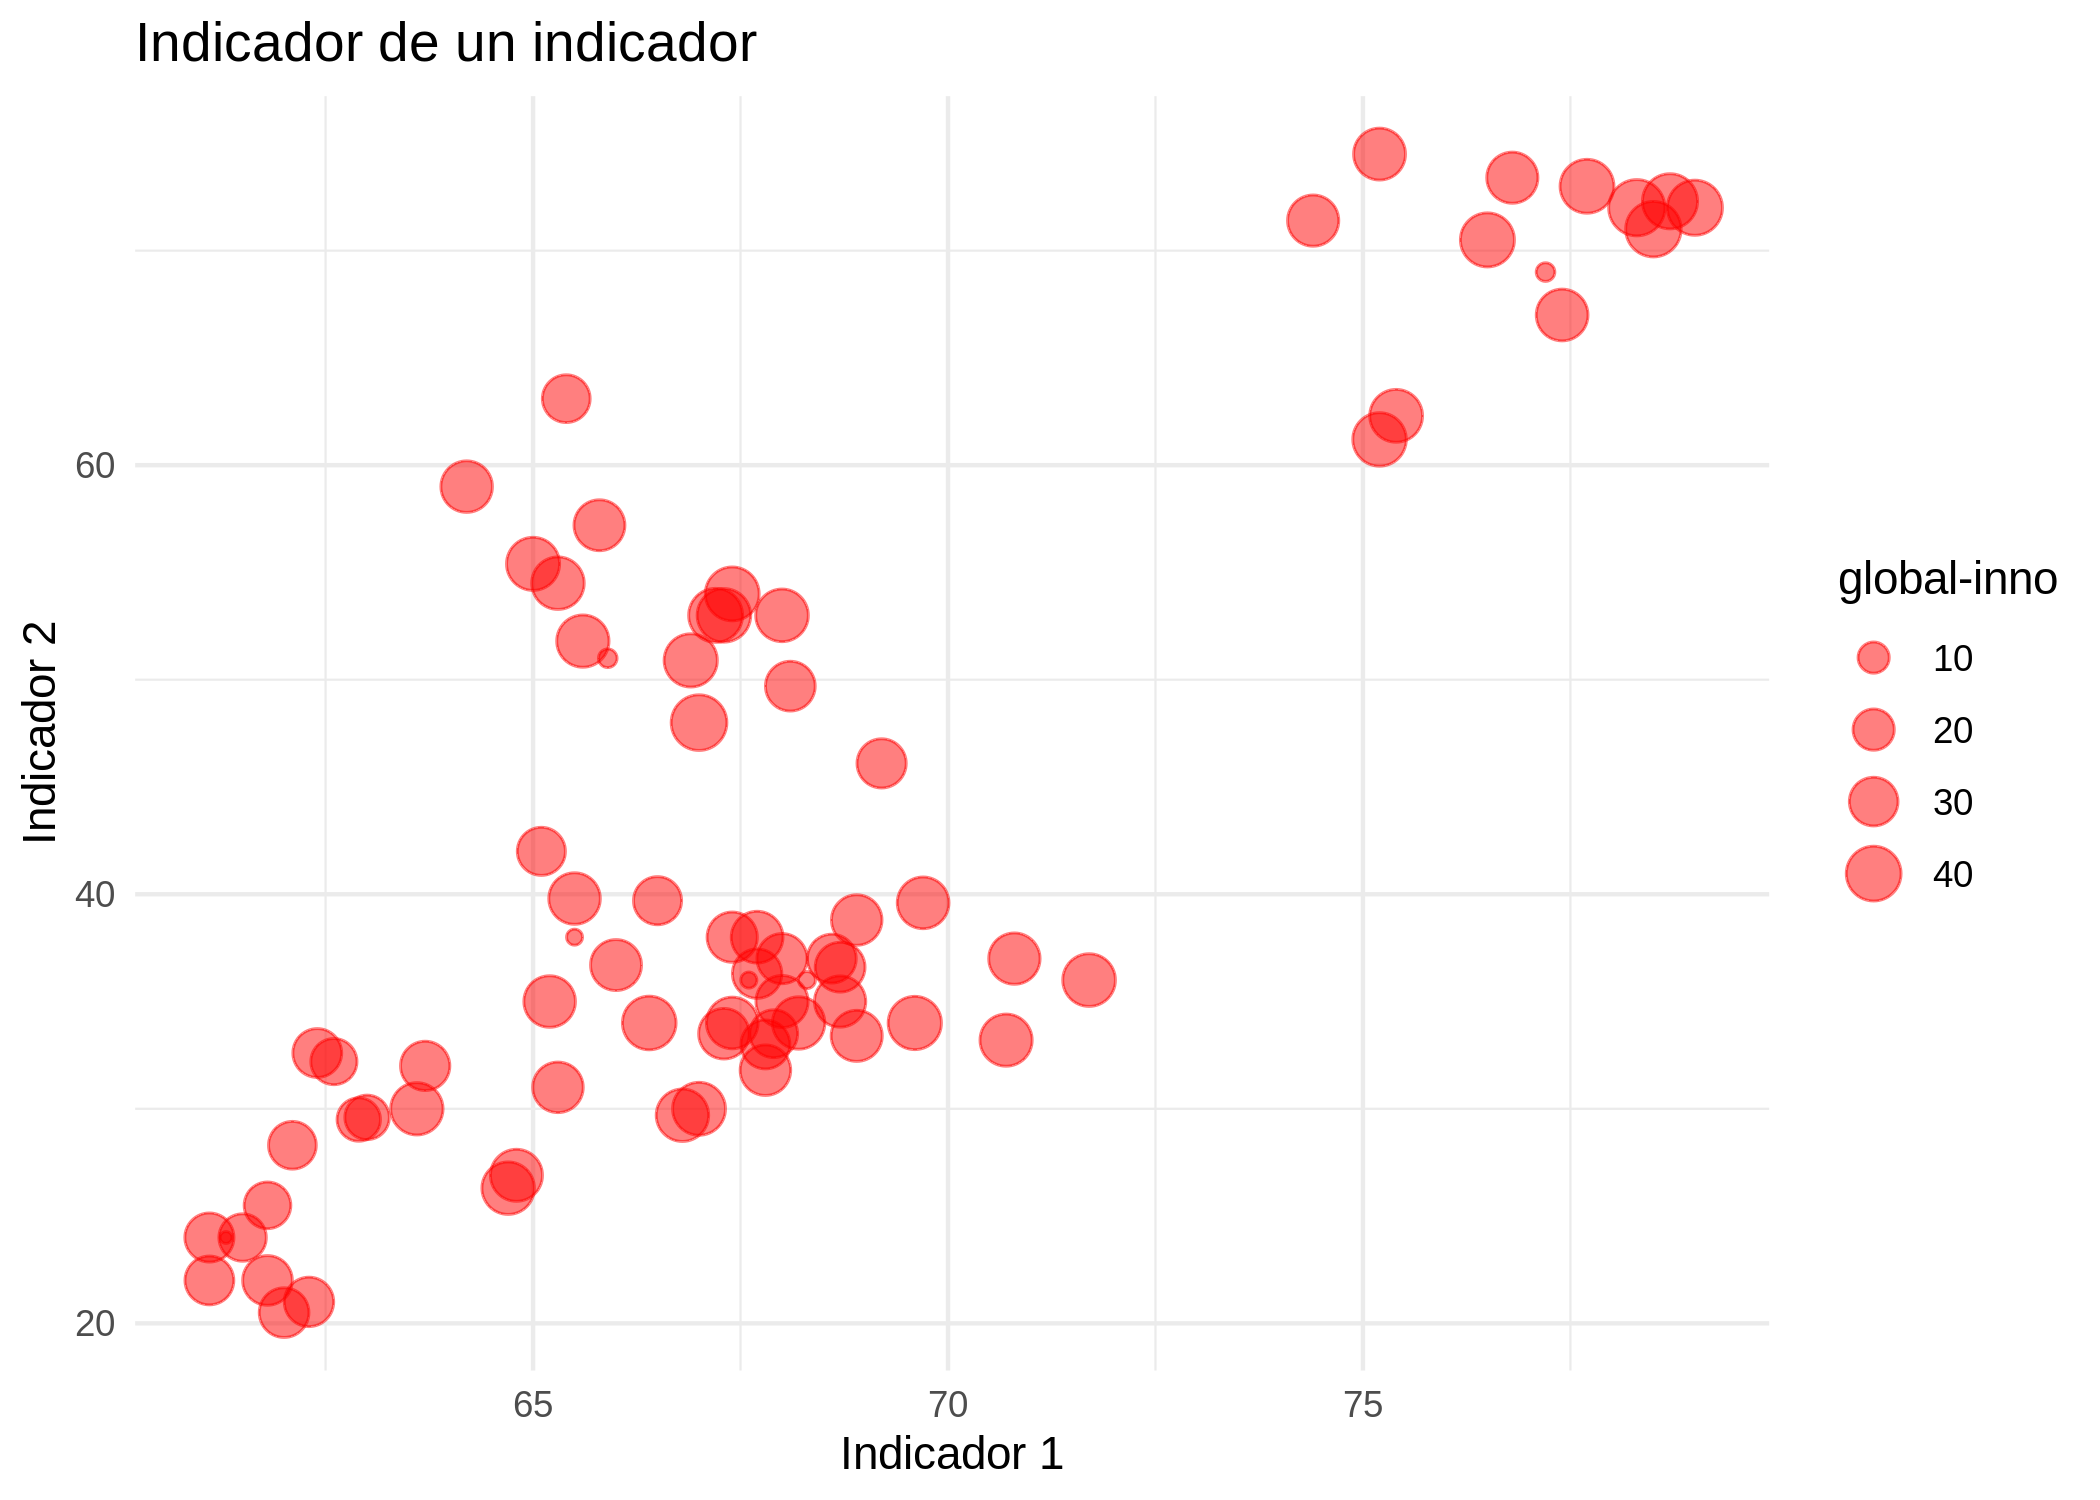

In [187]:
ggplot(data = indicadores, mapping = aes(x = `ind-lib-eco` , y = `ind-lib-eco-hf`, size = `global-inno`)) +
  geom_point(color='red',alpha=0.5) +
  theme_minimal() +
  labs(x='Indicador 1', y='Indicador 2', title = 'Indicador de un indicador' )

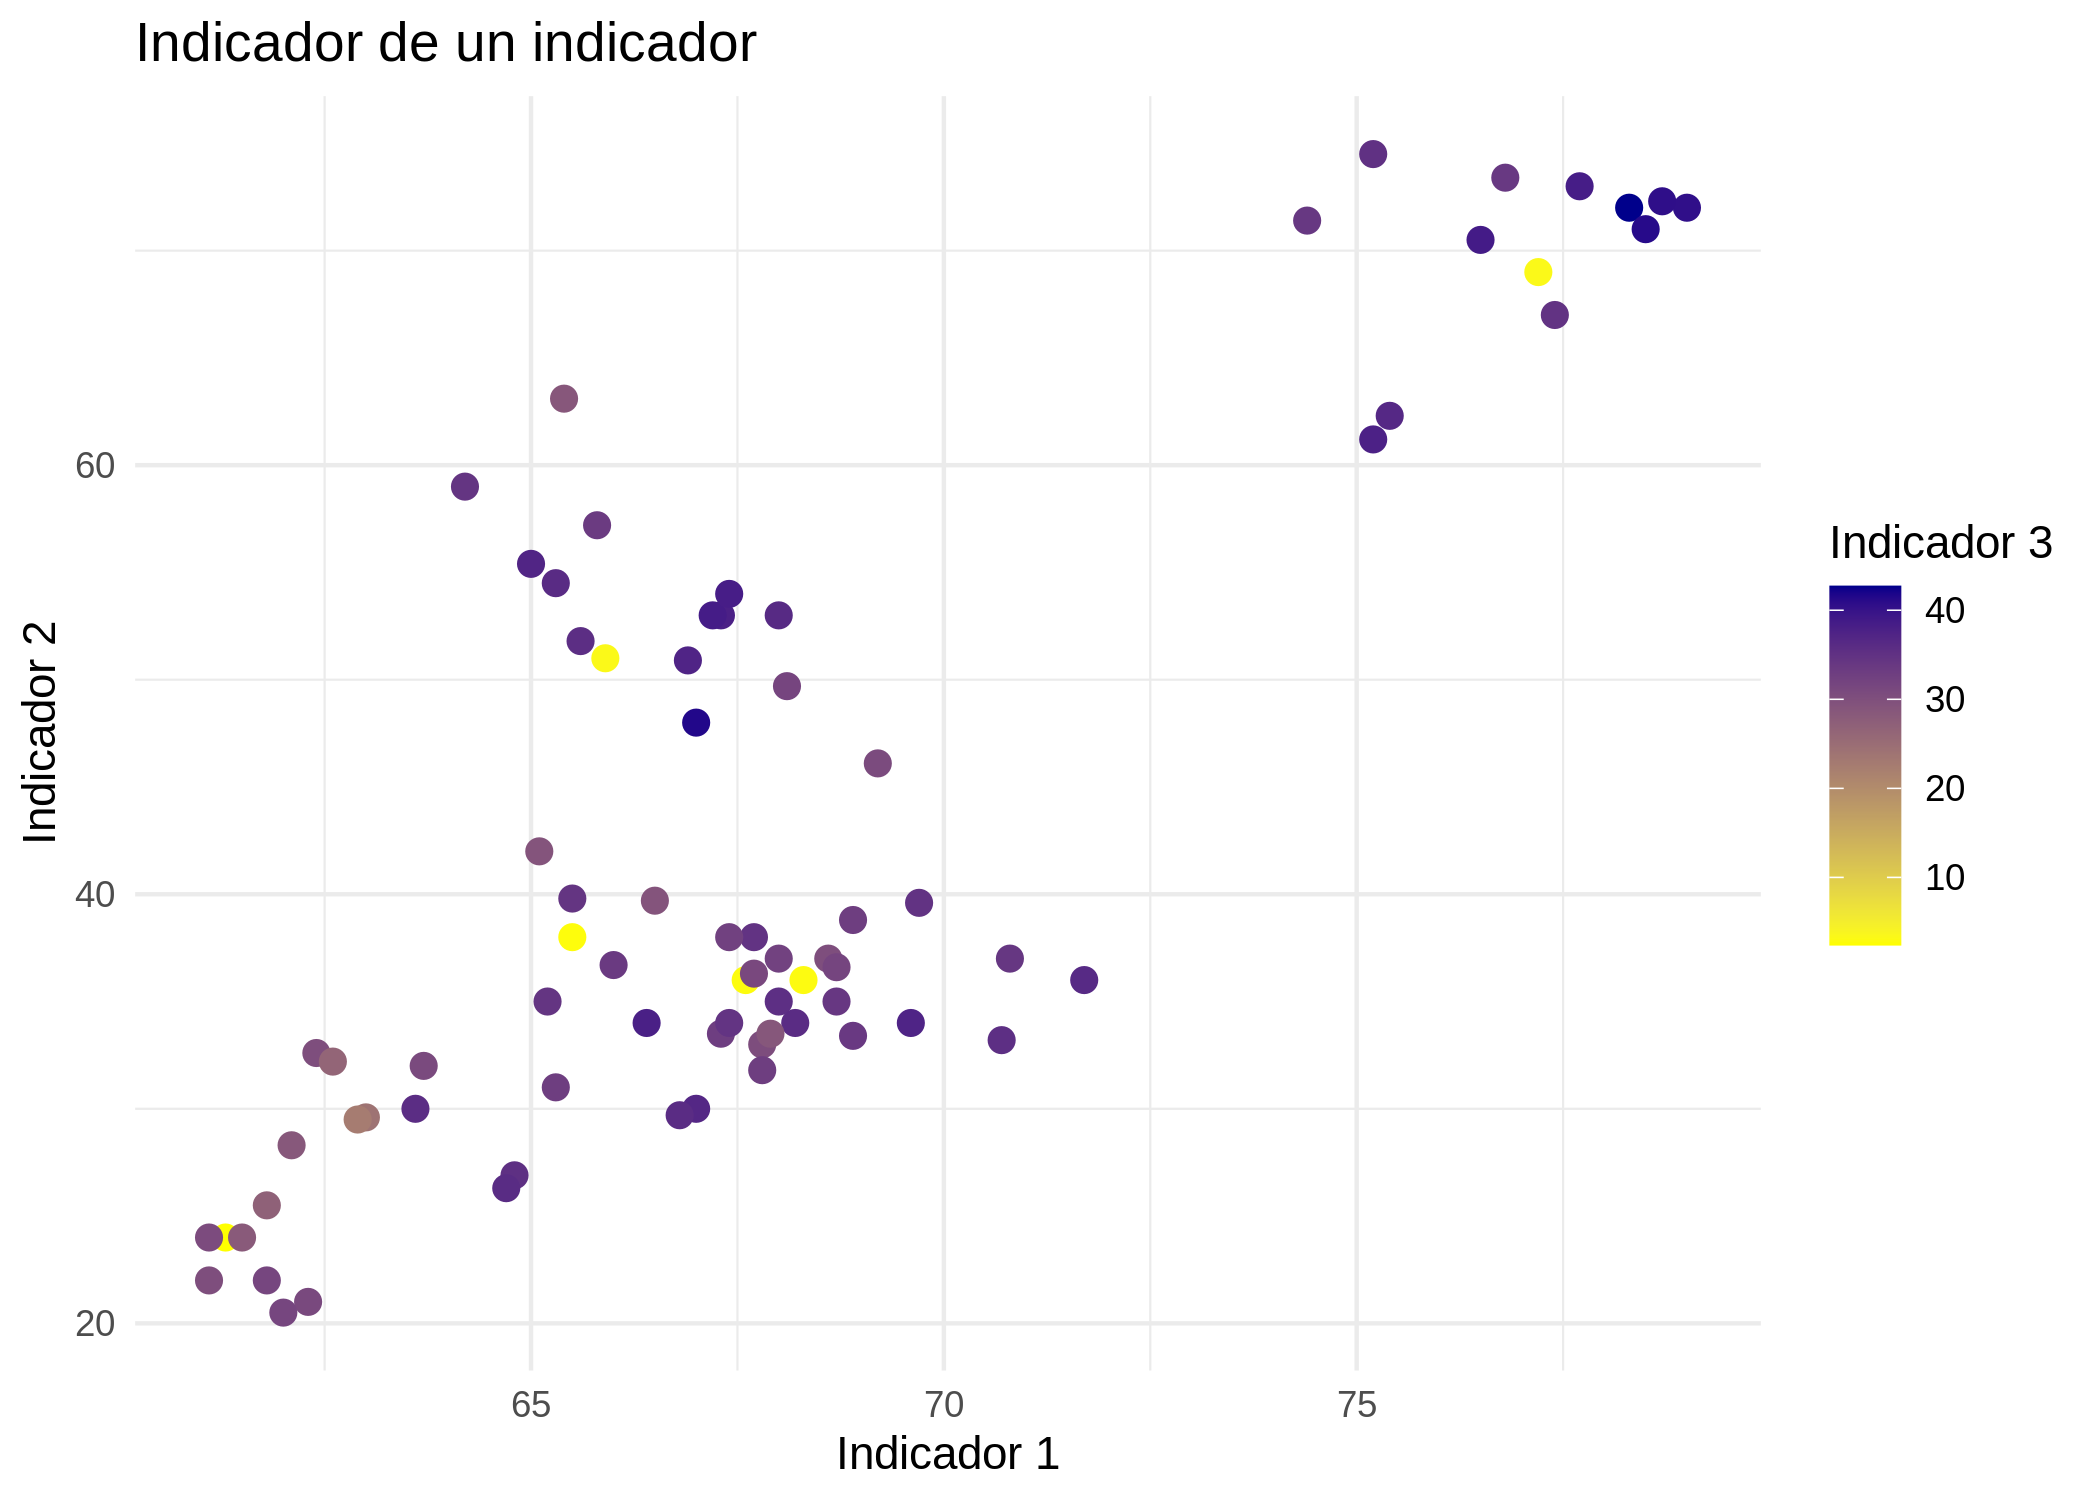

In [189]:
ggplot(data = indicadores, mapping = aes(x = `ind-lib-eco` , y = `ind-lib-eco-hf`, color = imi)) +
  geom_point(size=2.5) +
  theme_minimal() +
  scale_color_gradient(low = "yellow", high = "darkblue", name='Indicador 3')  +
  labs(x='Indicador 1', y='Indicador 2', title = 'Indicador de un indicador' )

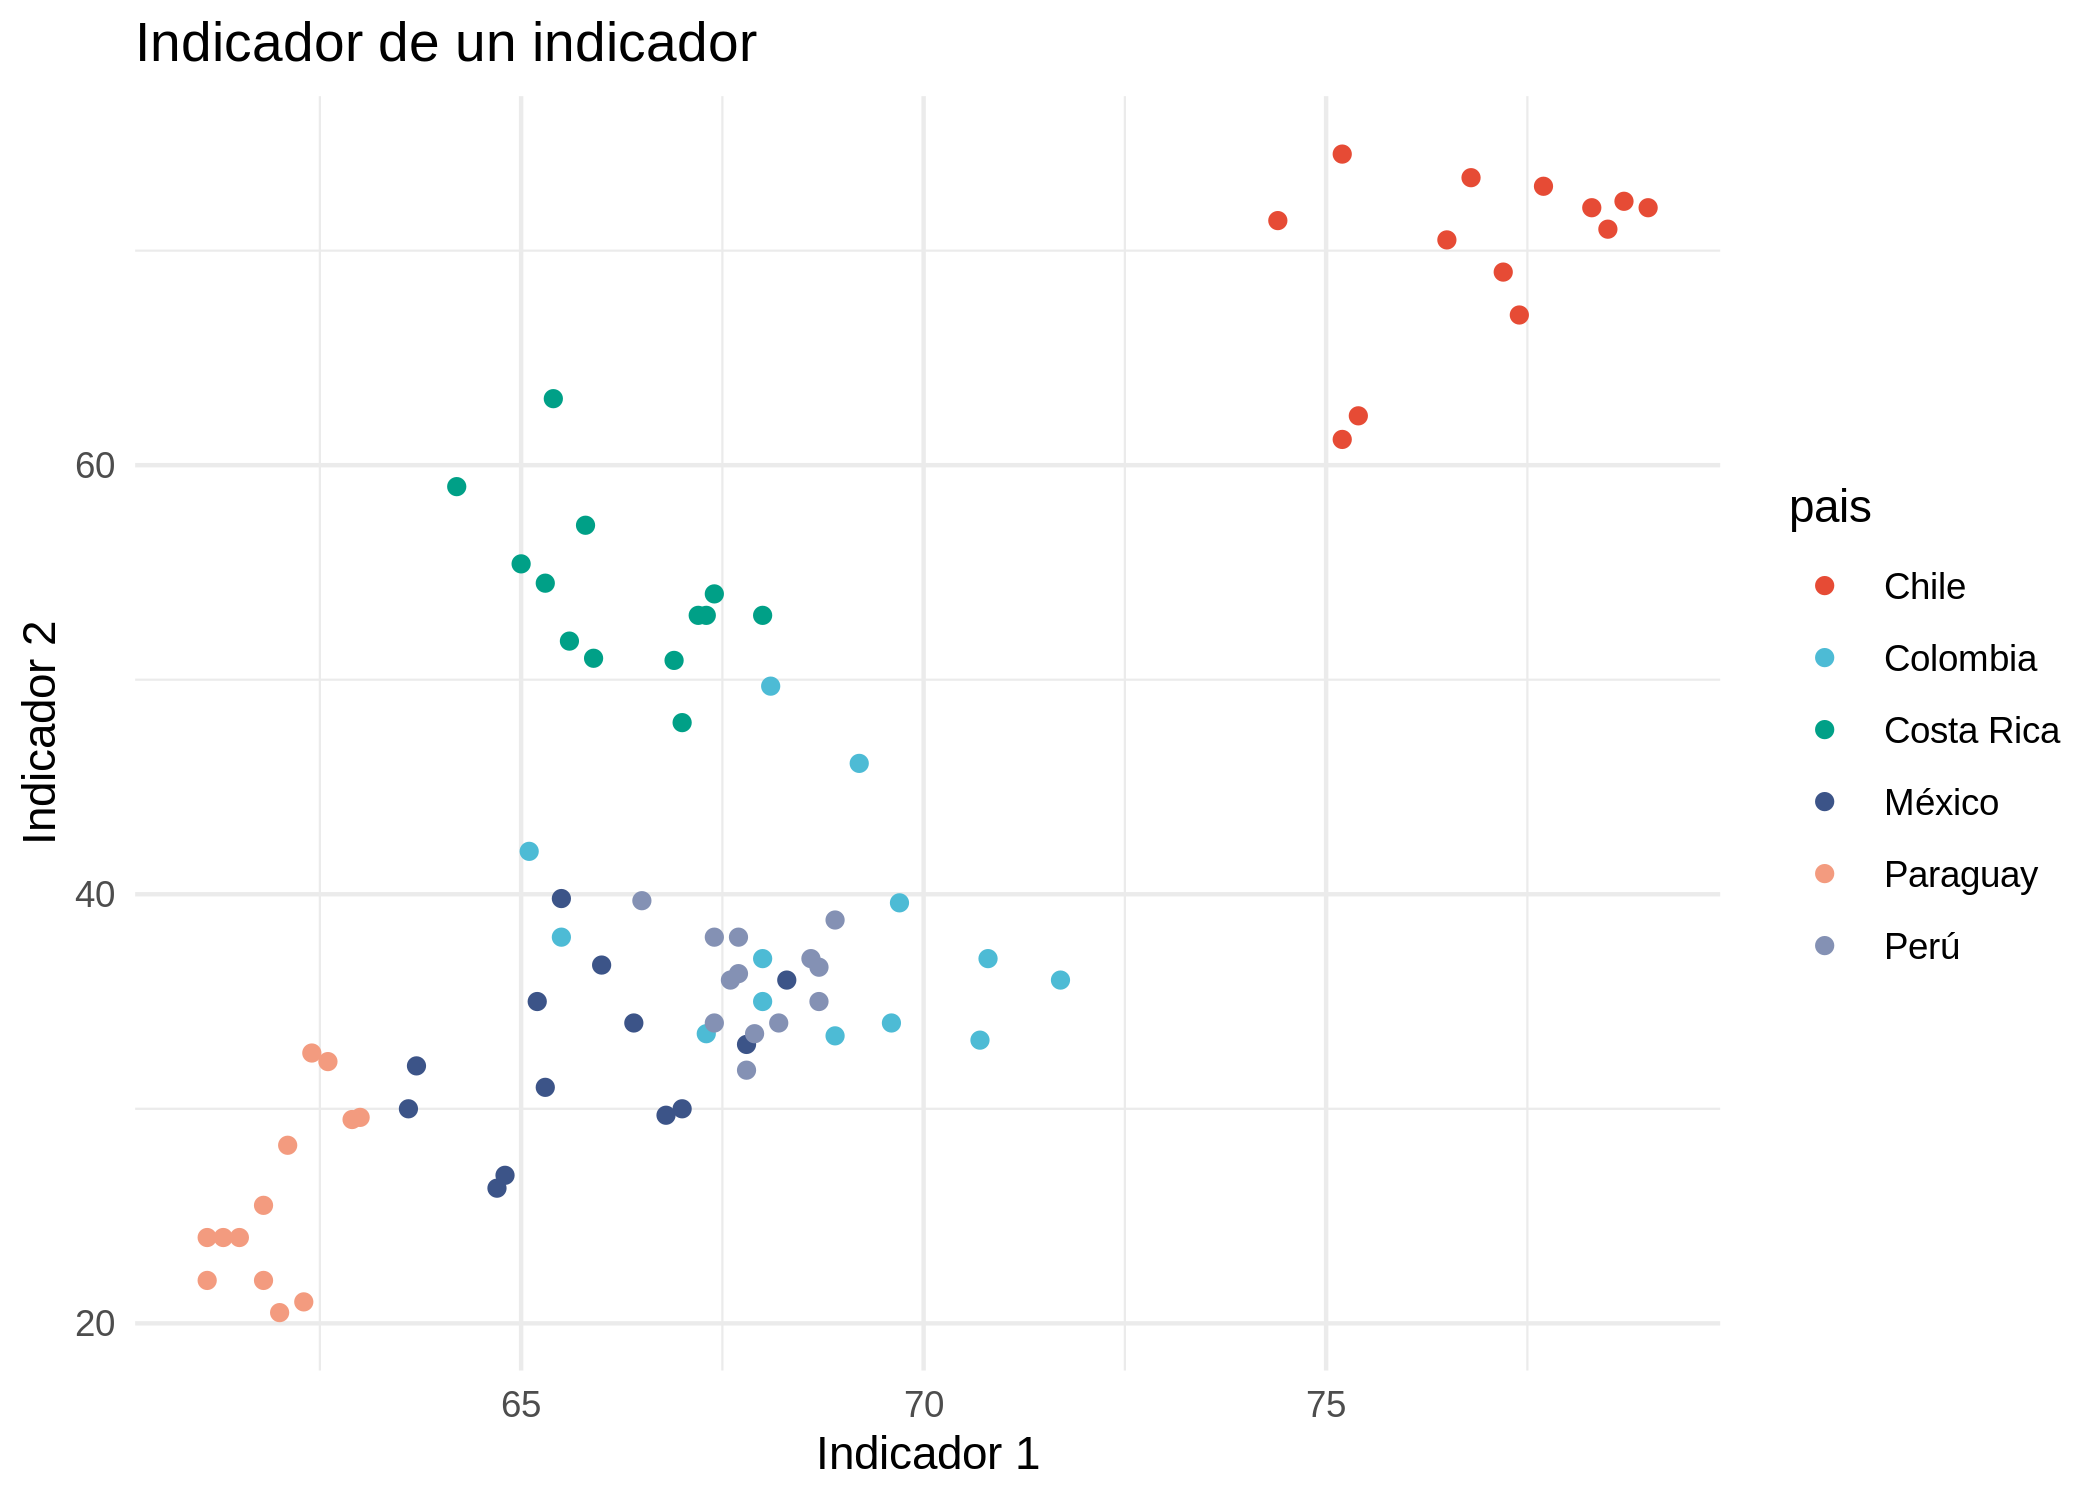

In [190]:
ggplot(data = indicadores) +
  geom_point(aes(x = `ind-lib-eco` , y = `ind-lib-eco-hf`, color = pais)) +
  theme_minimal() +
  scale_color_npg() +
  labs(x='Indicador 1', y='Indicador 2', title = 'Indicador de un indicador' )

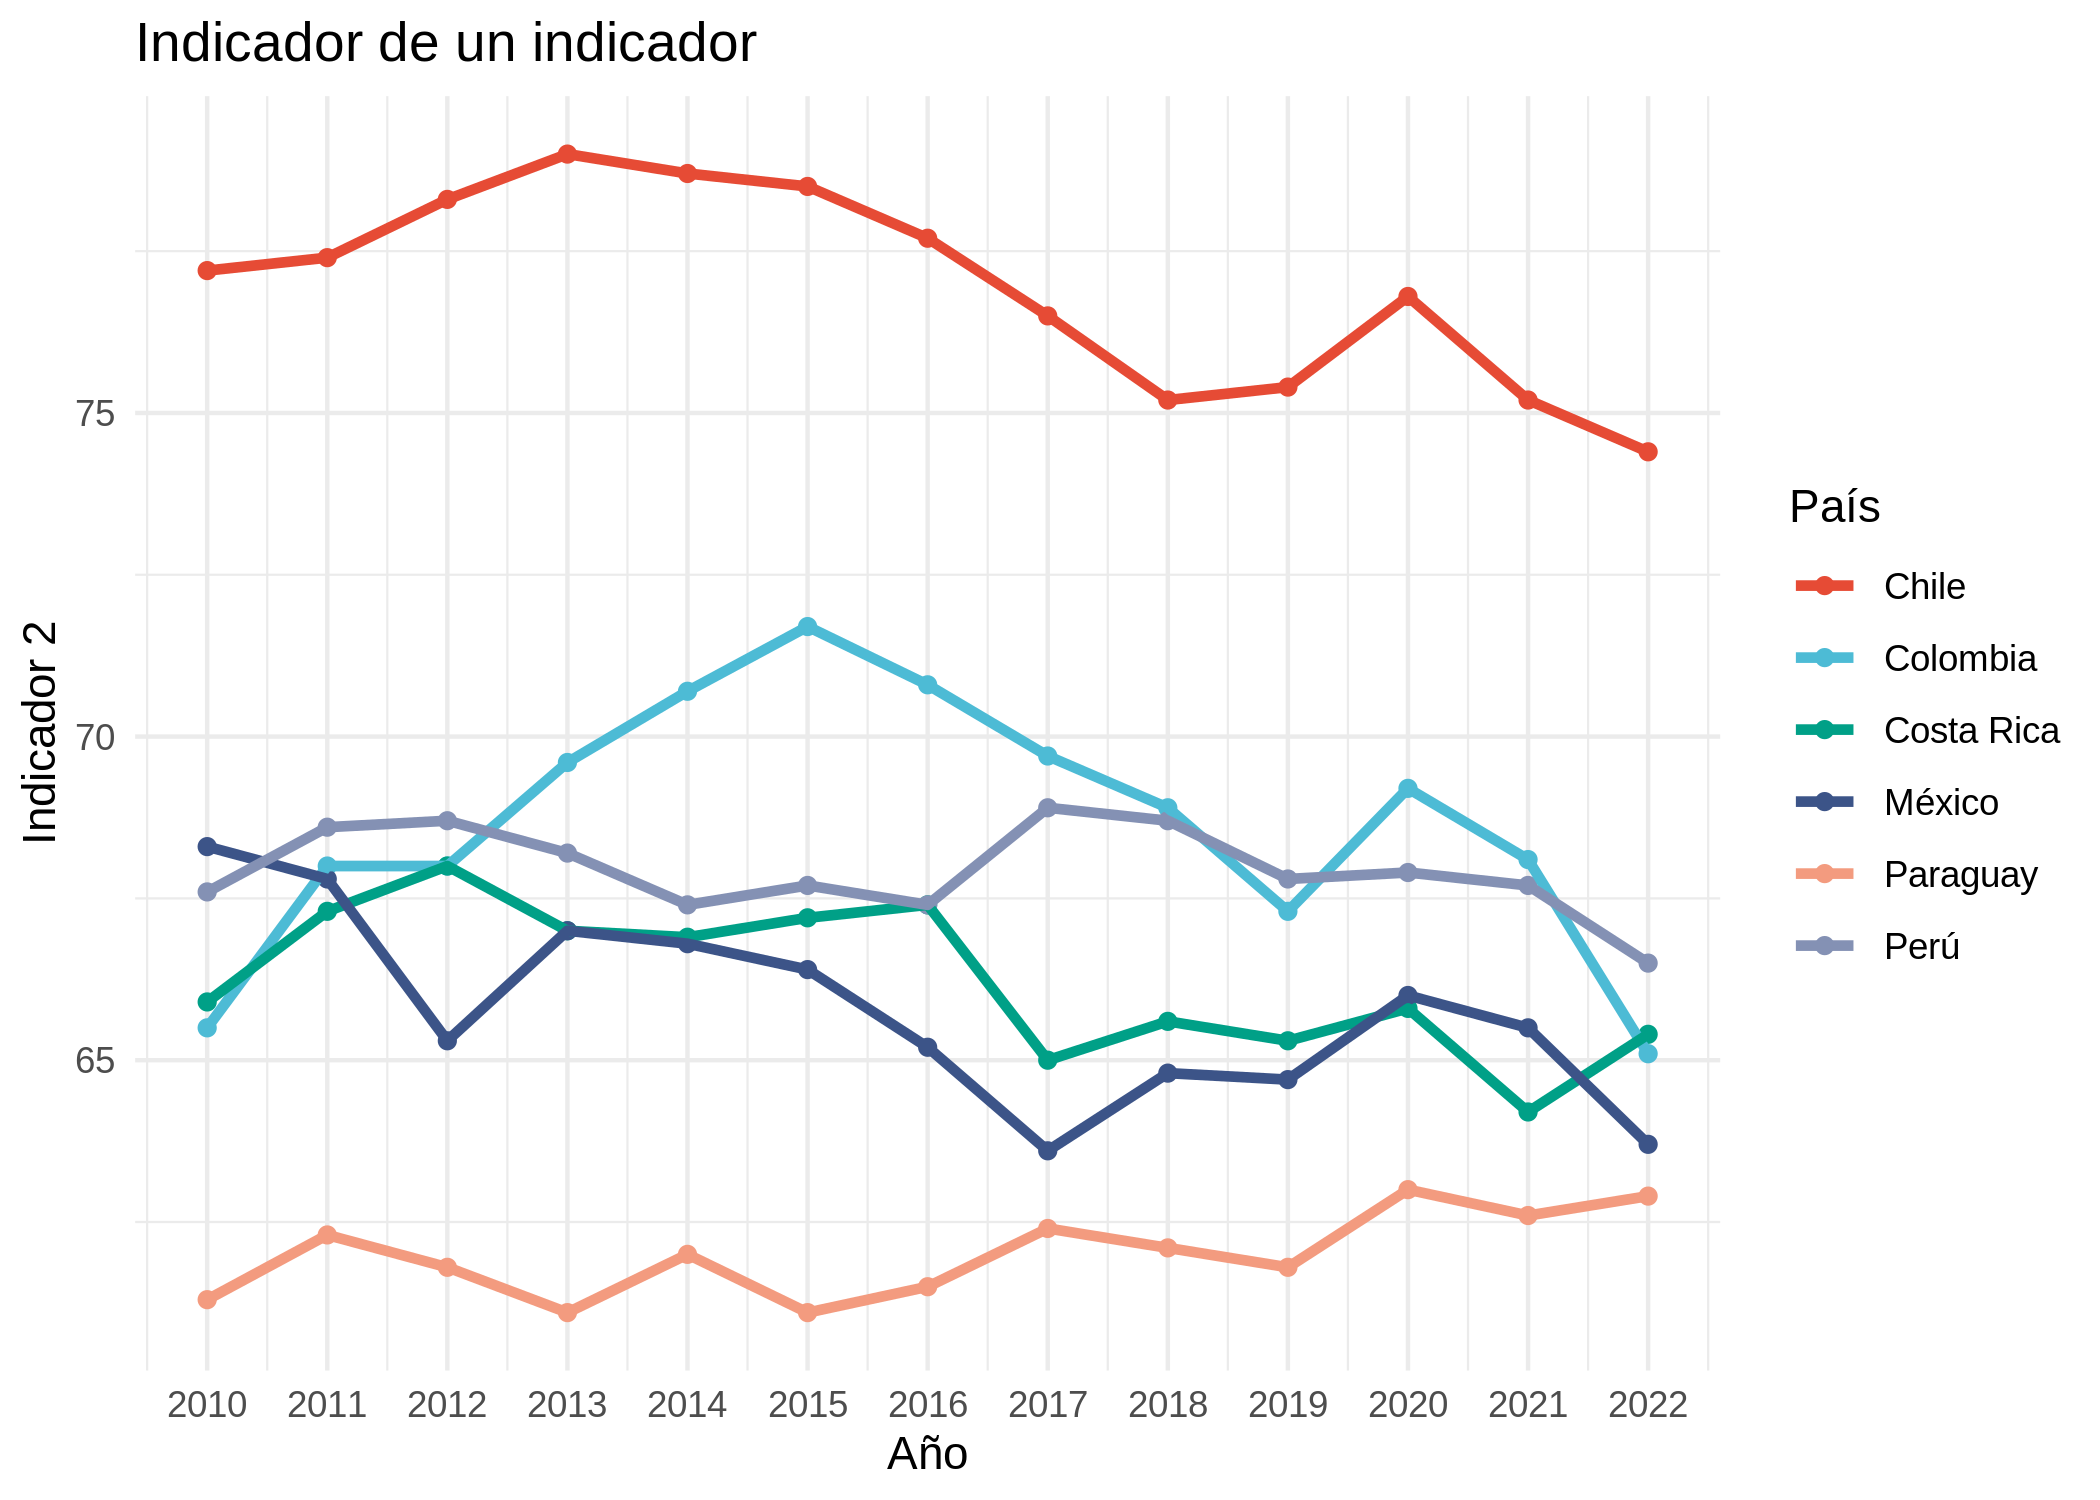

In [20]:
ggplot(data=indicadores, aes(x=anio, y=`ind-lib-eco`, color=pais)) +
  geom_point() +
  geom_line(linewidth=1.2) +
  theme_minimal() +
  scale_color_npg(name = 'País') +
  scale_x_continuous(breaks = seq(2010,2022,1)) +
  labs(x='Año', y='Indicador 2', title = 'Indicador de un indicador' )

In [29]:
# Library
library(fmsb)

# Create data: note in High school for Jonathan:
data <- as.data.frame(matrix( sample( 2:20 , 10 , replace=T) , ncol=10))
colnames(data) <- c("math" , "english" , "biology" , "music" , "R-coding", "data-viz" , "french" , "physic", "statistic", "sport" )
data <- rbind(rep(20,10) , rep(0,10) , data)

In [ ]:
ggplot(data = indi_long, aes(x = reorder(pais,-`gover-effect`), y = `gover-effect`, color = pais)) +
  theme_minimal() +
  scale_color_npg() +
  geom_boxplot() +
  geom_jitter(alpha = 0.3) +
  labs(x='País', y='Indicador', title = 'Indicador de un indicador')

In [40]:
indi_long <- pivot_longer(indicadores,cols = `sdg-wi`:`ind-hum-cap`, names_to = 'all_ind', values_to='val_ind')

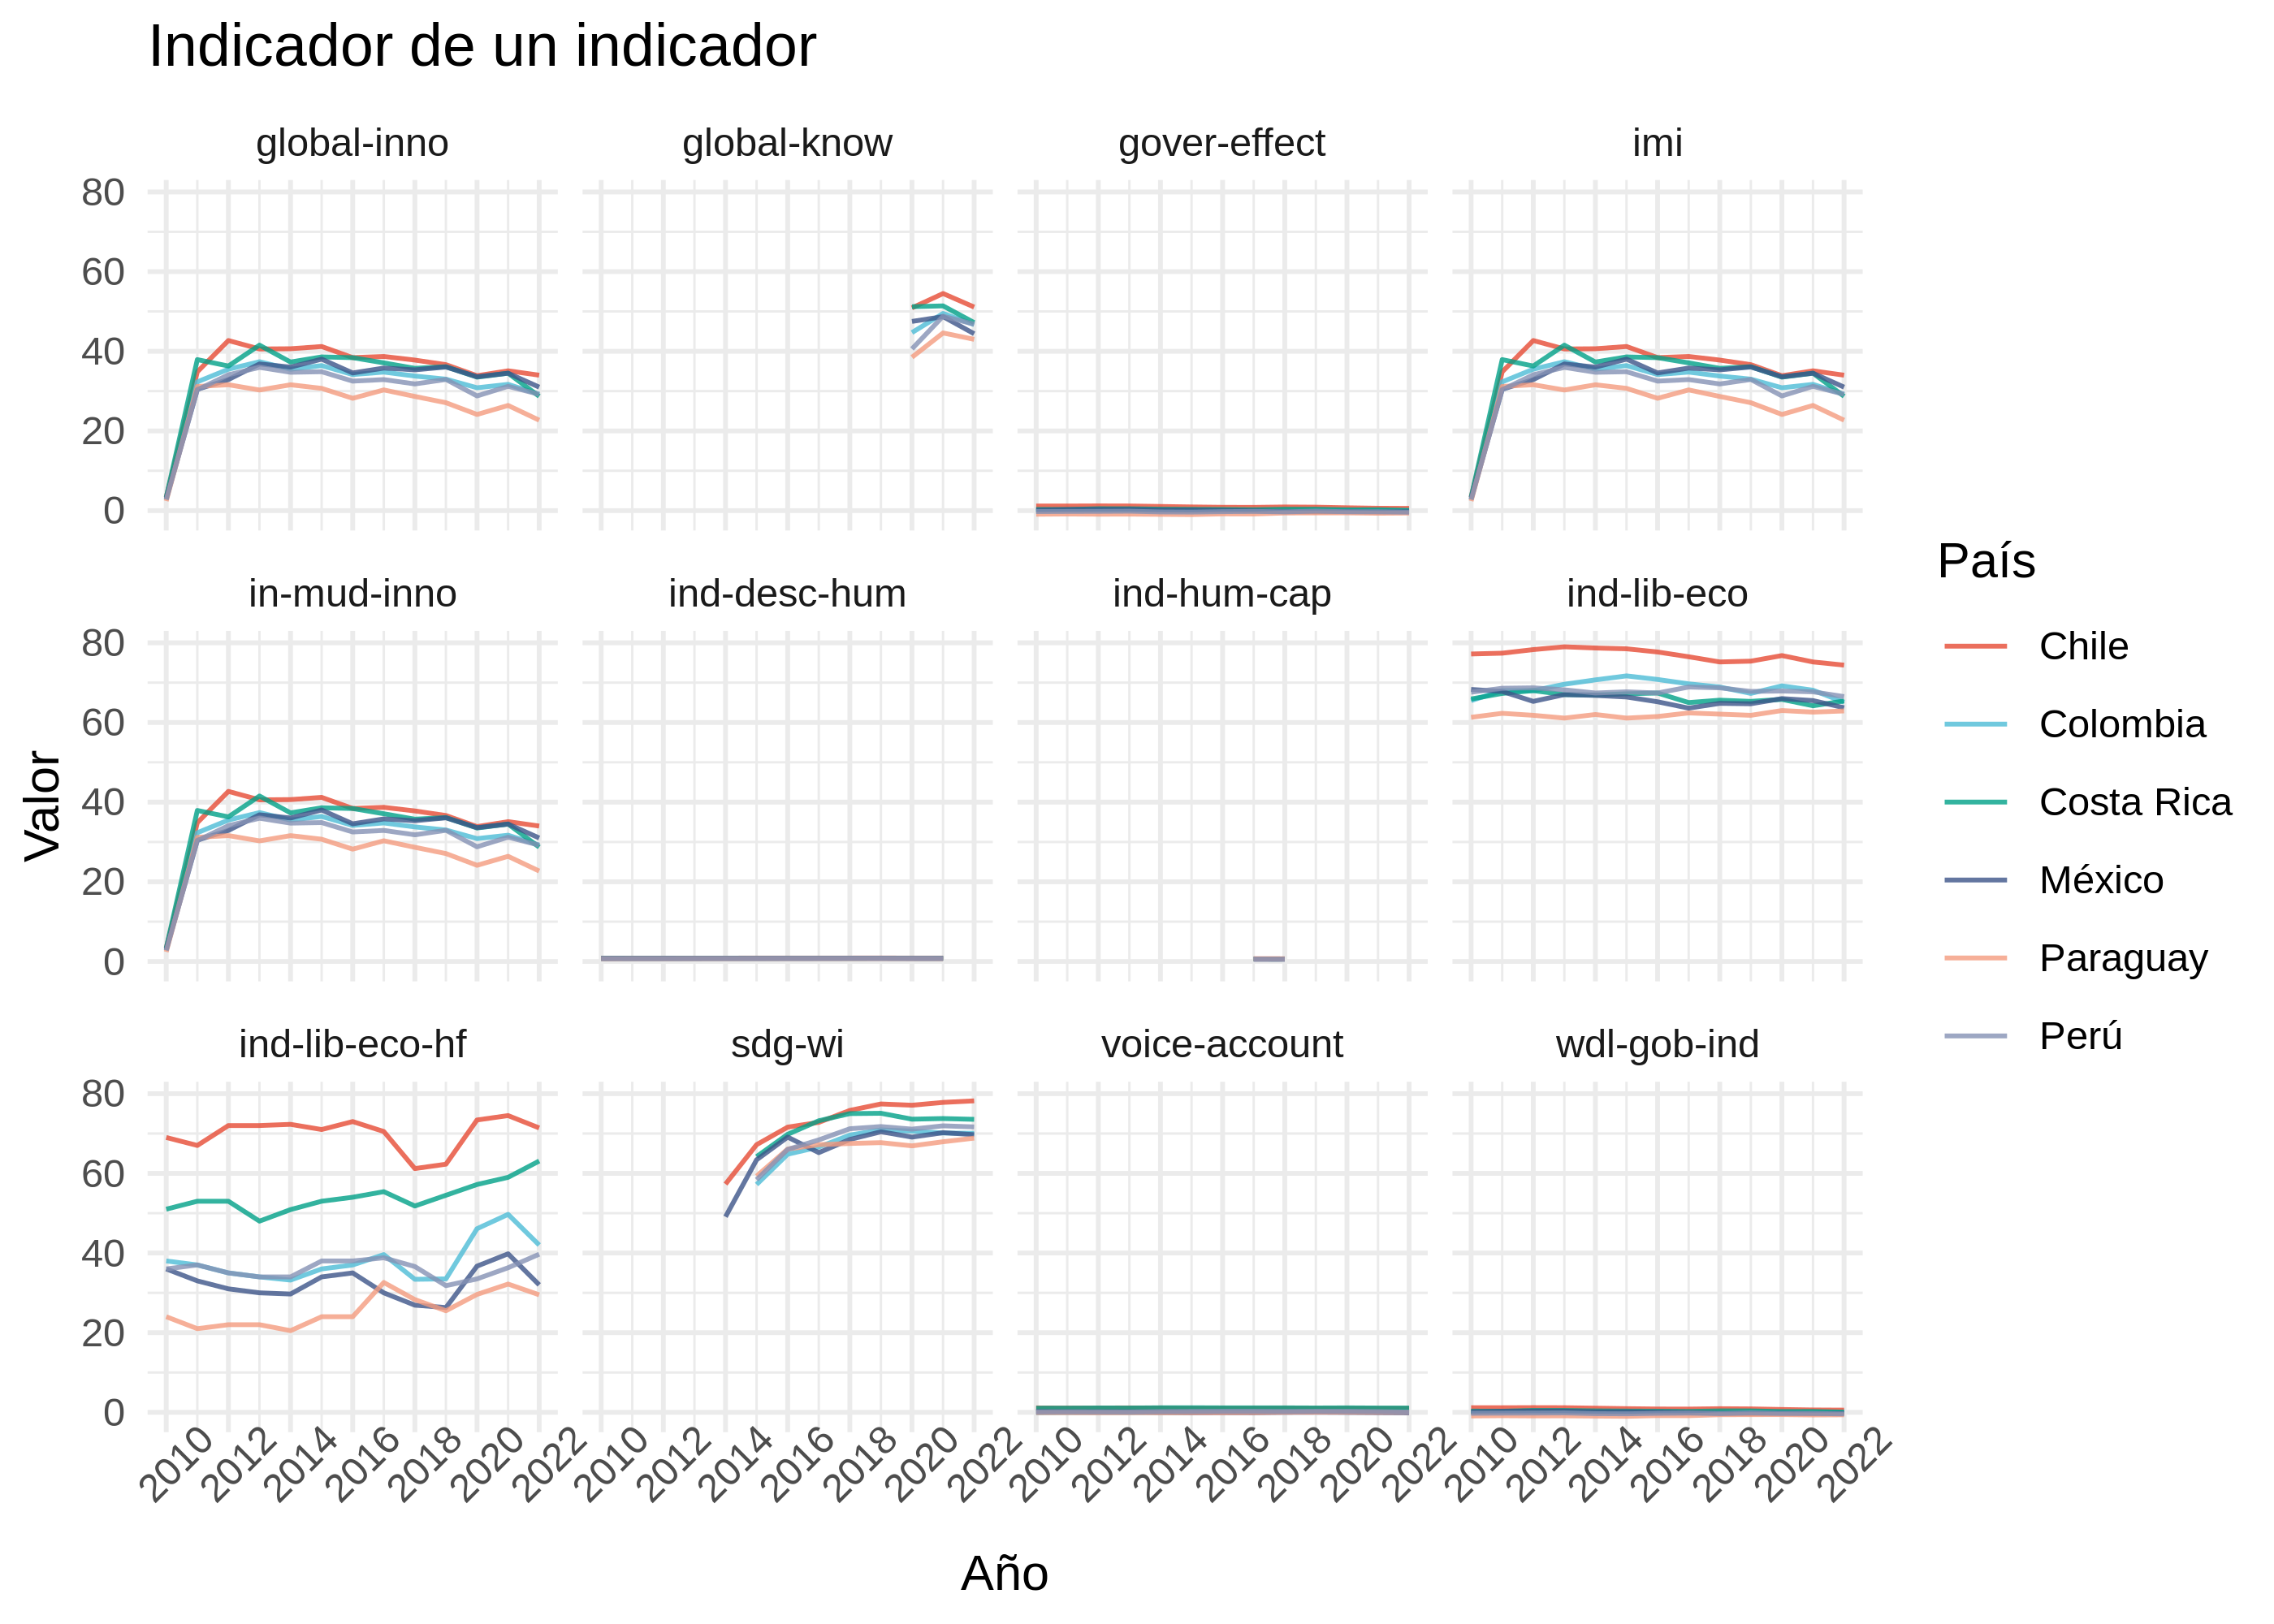

In [65]:
options(repr.plot.with = 1, repr.plot.height = 5, repr.plot.res=400)
ggplot(indi_long, aes(x = anio, y = val_ind)) +
  theme_minimal() +
  geom_line(aes(color = pais), na.rm=TRUE, alpha=0.8) +
  facet_wrap(~all_ind) +
  scale_x_continuous(breaks = seq(2010,2022,2)) +
  theme(axis.text.x = element_text(angle = 45))+
  scale_color_npg(name = 'País') +
  labs(x='Año', y='Valor', title = 'Indicador de un indicador')

Warning message:
“Removed 148 rows containing missing values (`geom_point()`).”


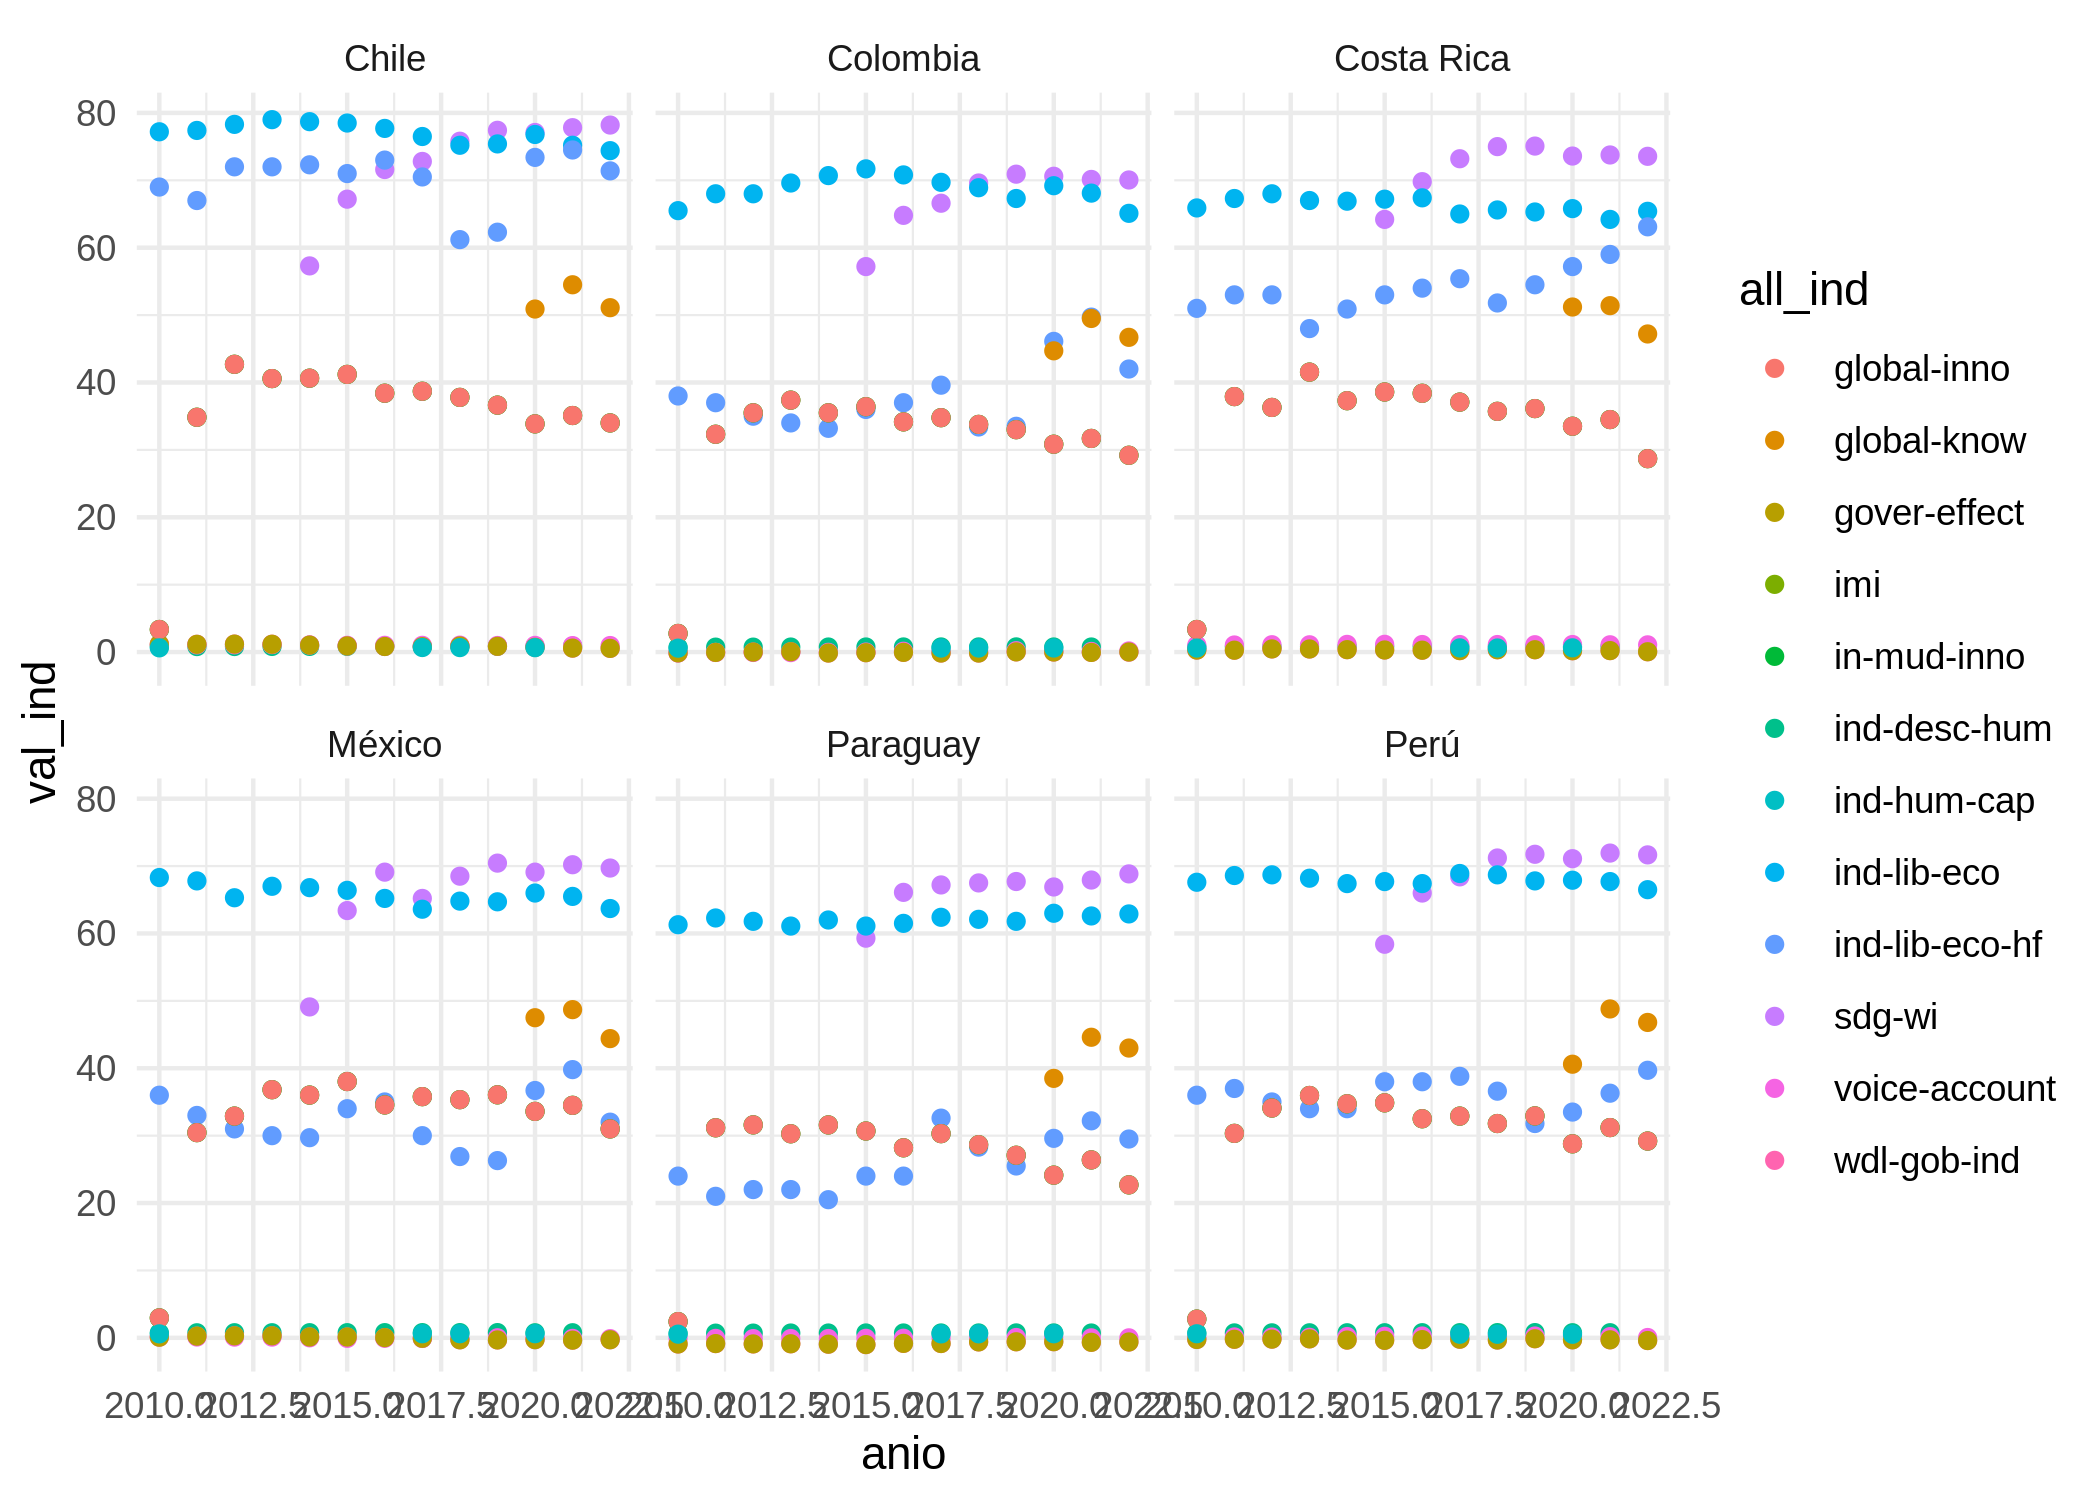

In [47]:
ggplot(indi_long, aes(x = anio, y = val_ind)) +
    theme_minimal() +
  geom_point(aes(color = all_ind)) +
  facet_wrap(~pais) +

In [69]:
chile <- indi_long[indi_long$pais=='Chile',]

In [70]:
head(chile)

id,anio,pais,all_ind,val_ind
<dbl>,<int>,<chr>,<chr>,<dbl>
1,2010,Chile,sdg-wi,NA
1,2010,Chile,ind-desc-hum,0.813
1,2010,Chile,wdl-gob-ind,1.160
1,2010,Chile,ind-lib-eco,77.200
1,2010,Chile,ind-lib-eco-hf,69.000
1,2010,Chile,voice-account,1.100


Warning message:
“Removed 24 rows containing missing values (`geom_point()`).”


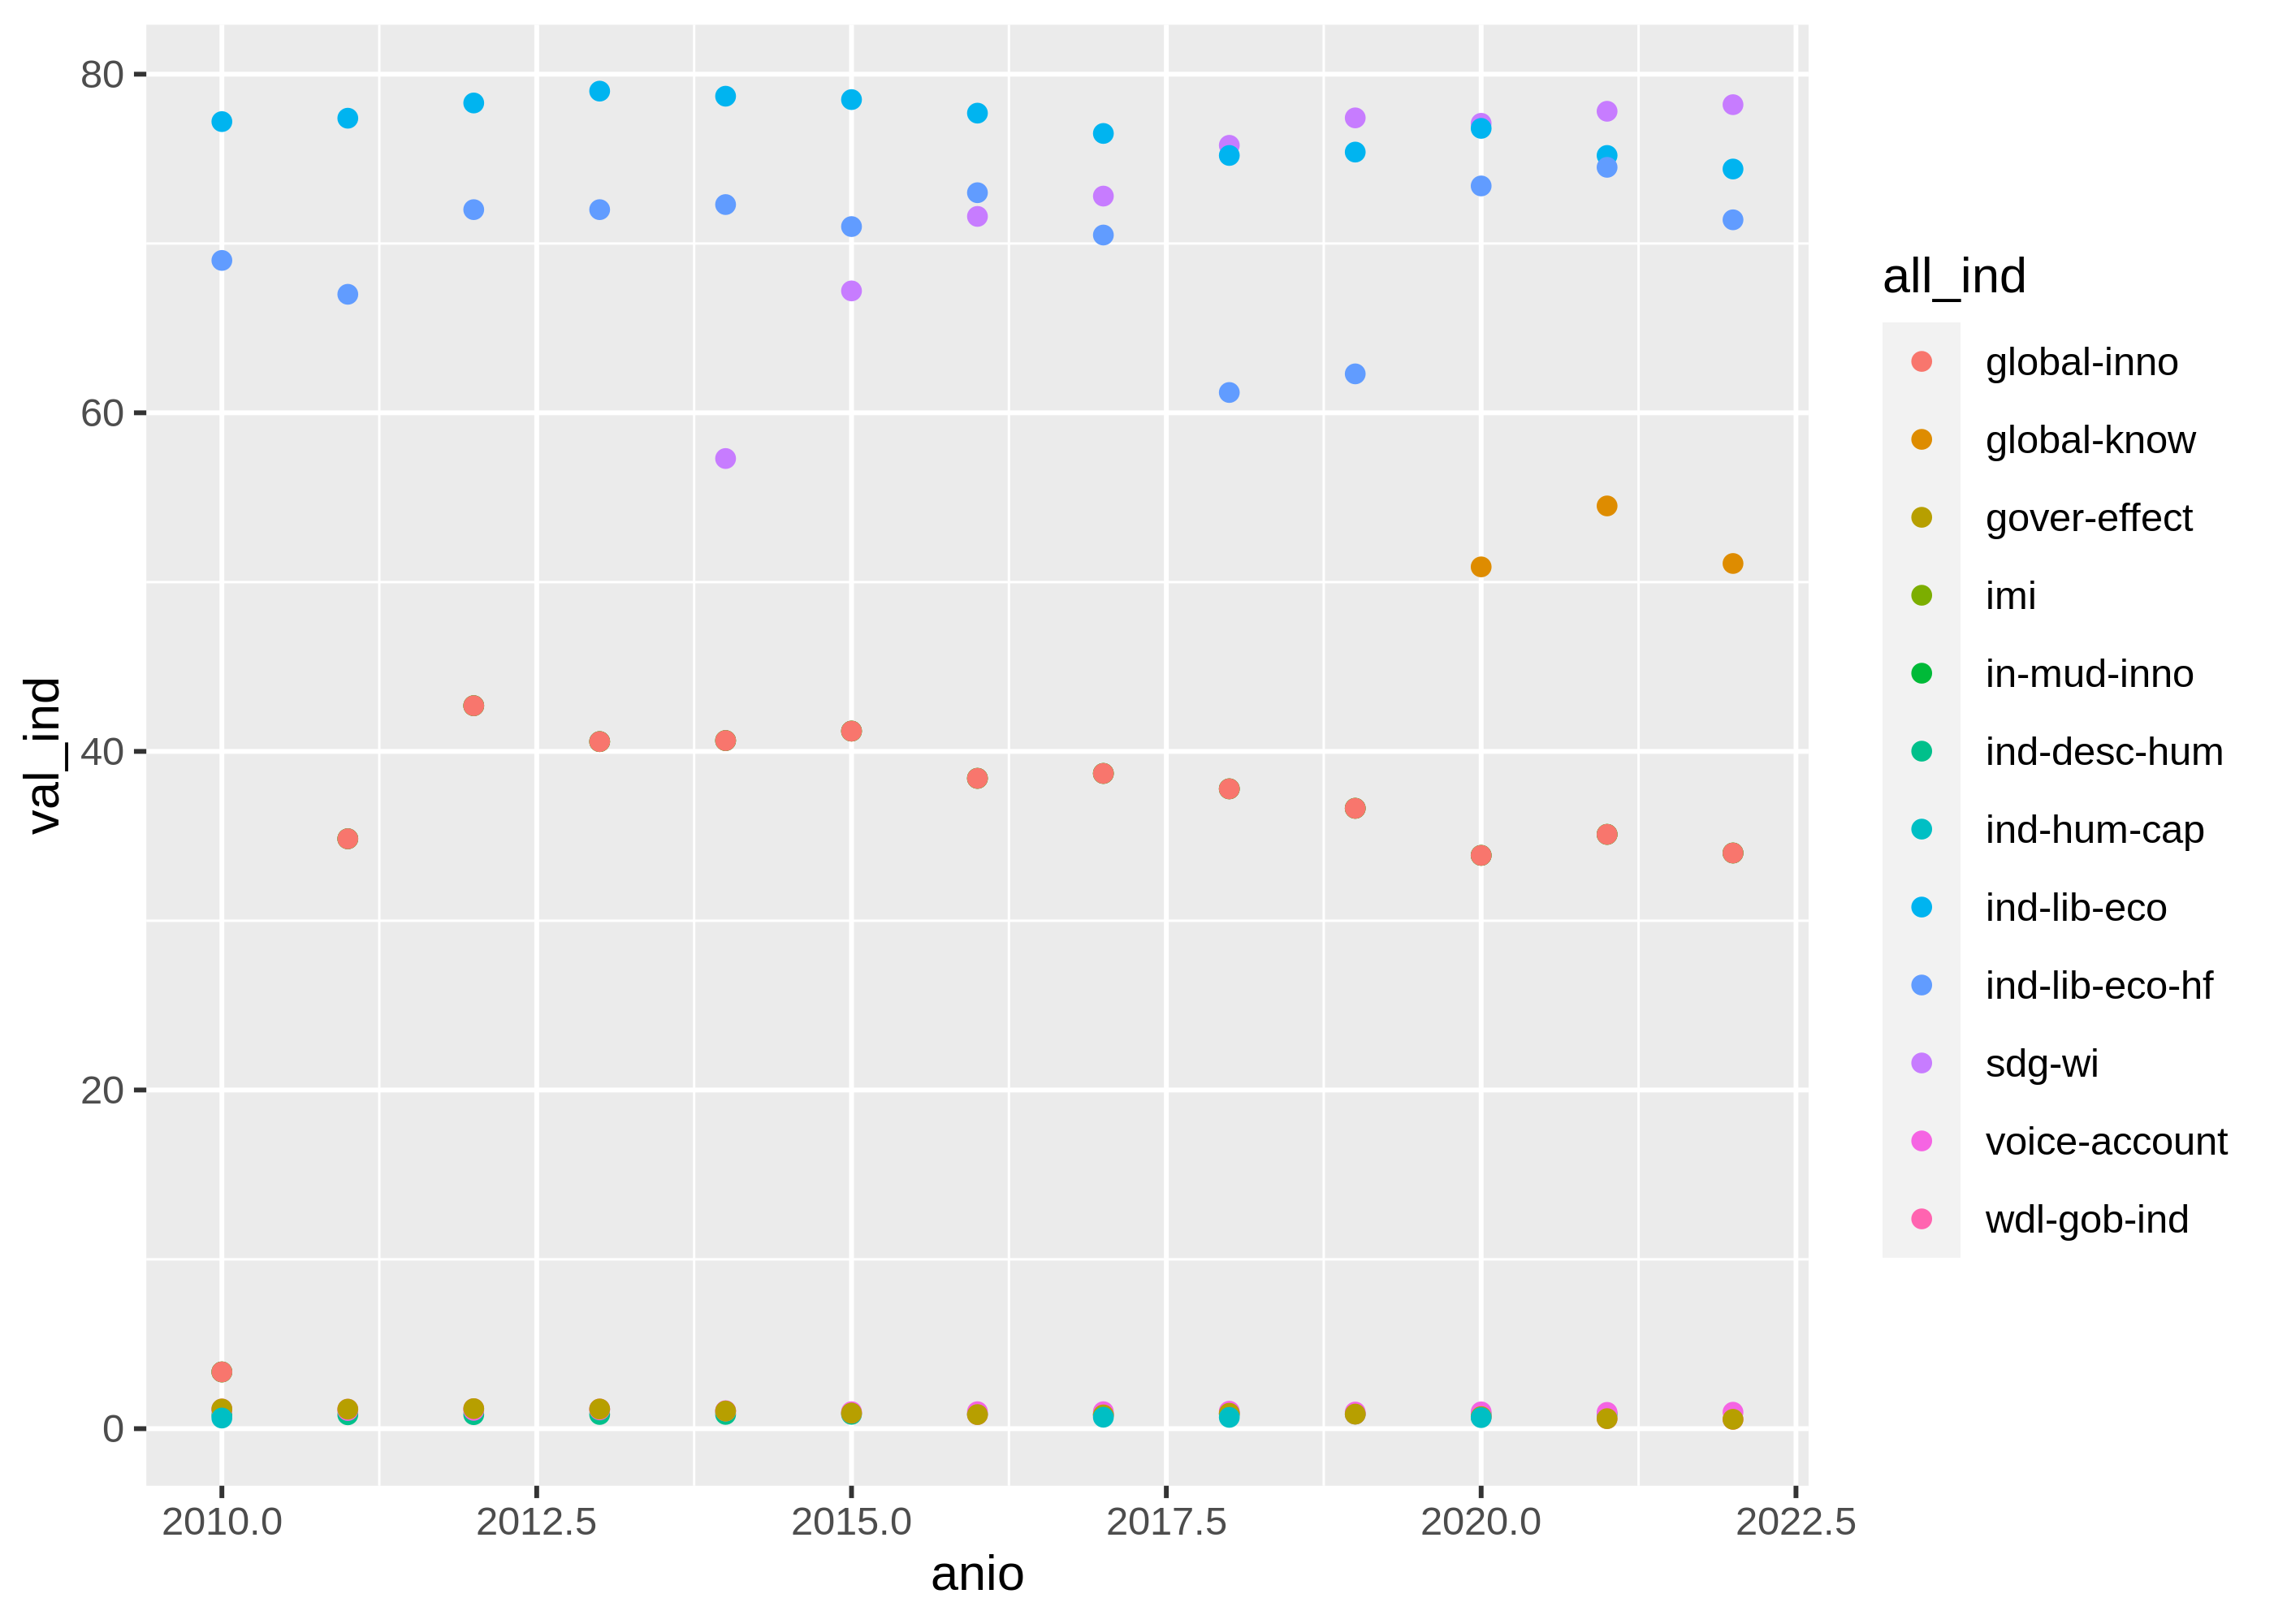

In [72]:
ggplot(chile, aes(x=anio,y=val_ind,color=all_ind))+
  geom_point()

Warning message:
“Removed 24 rows containing missing values (`geom_bar()`).”


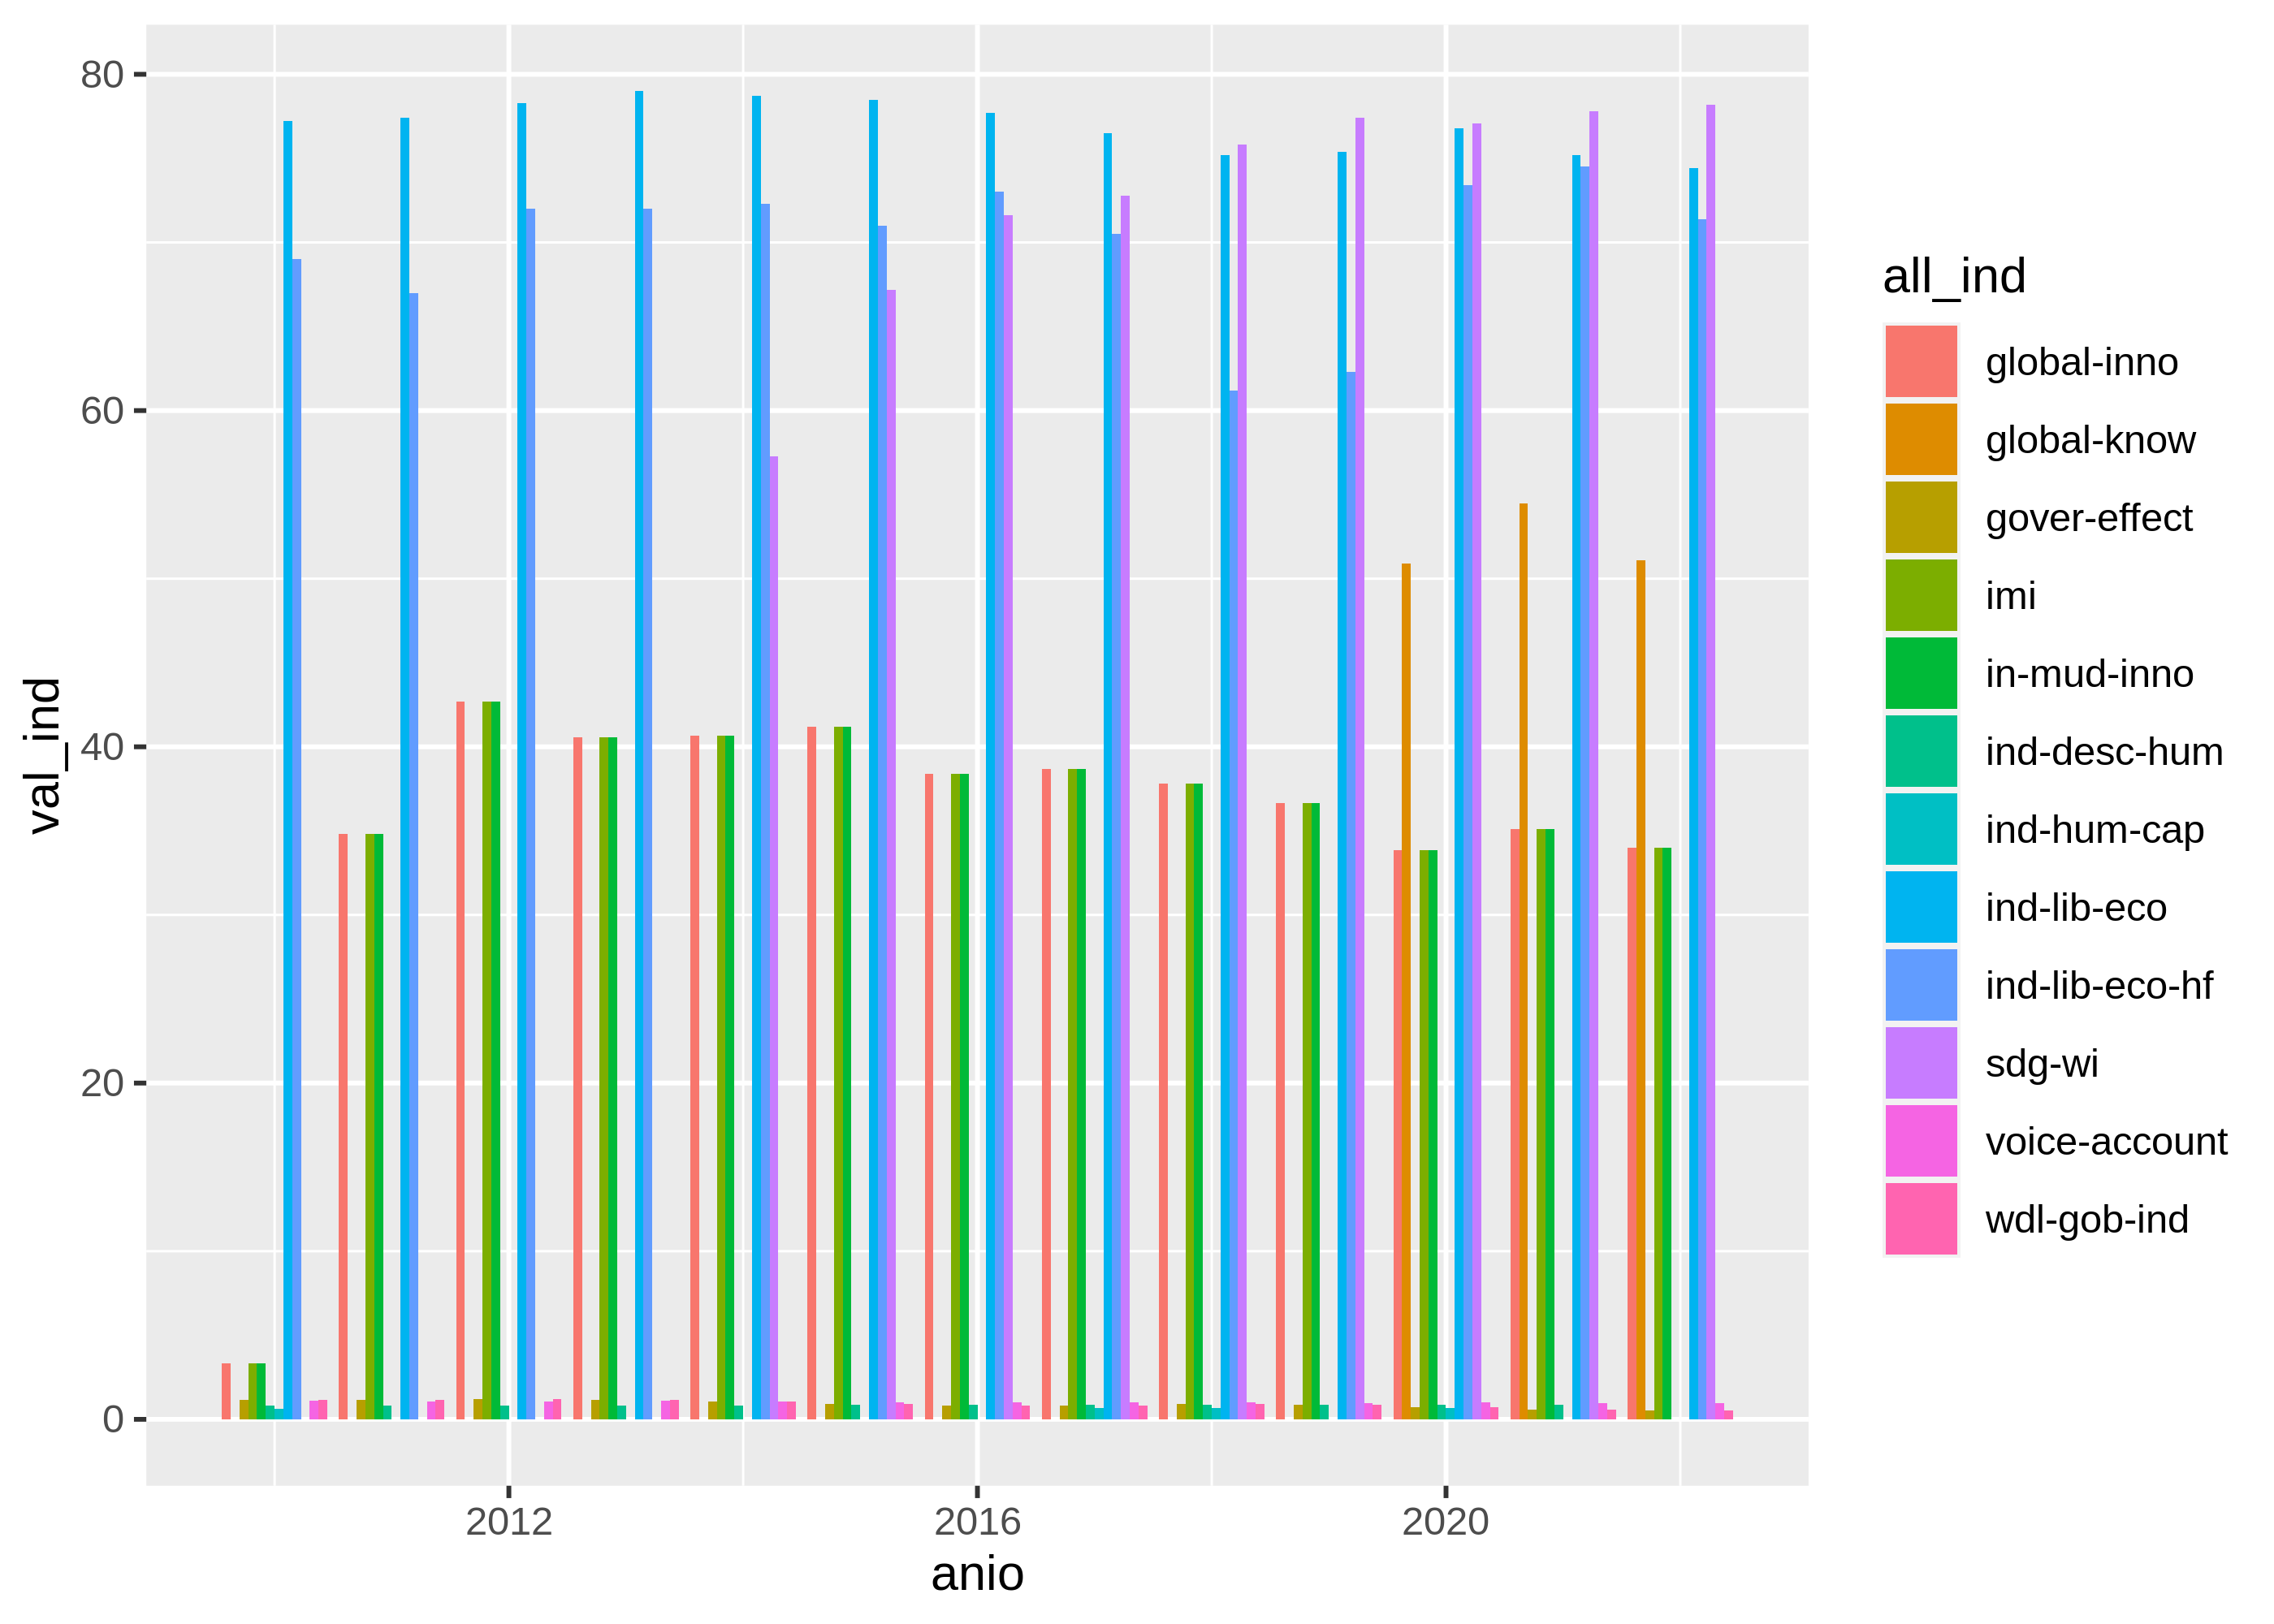

In [77]:
ggplot(chile, aes(x=anio,y=val_ind,fill=all_ind))+
  geom_bar(stat="identity",position=position_dodge())

Warning message:
“Removed 24 rows containing missing values (`position_stack()`).”


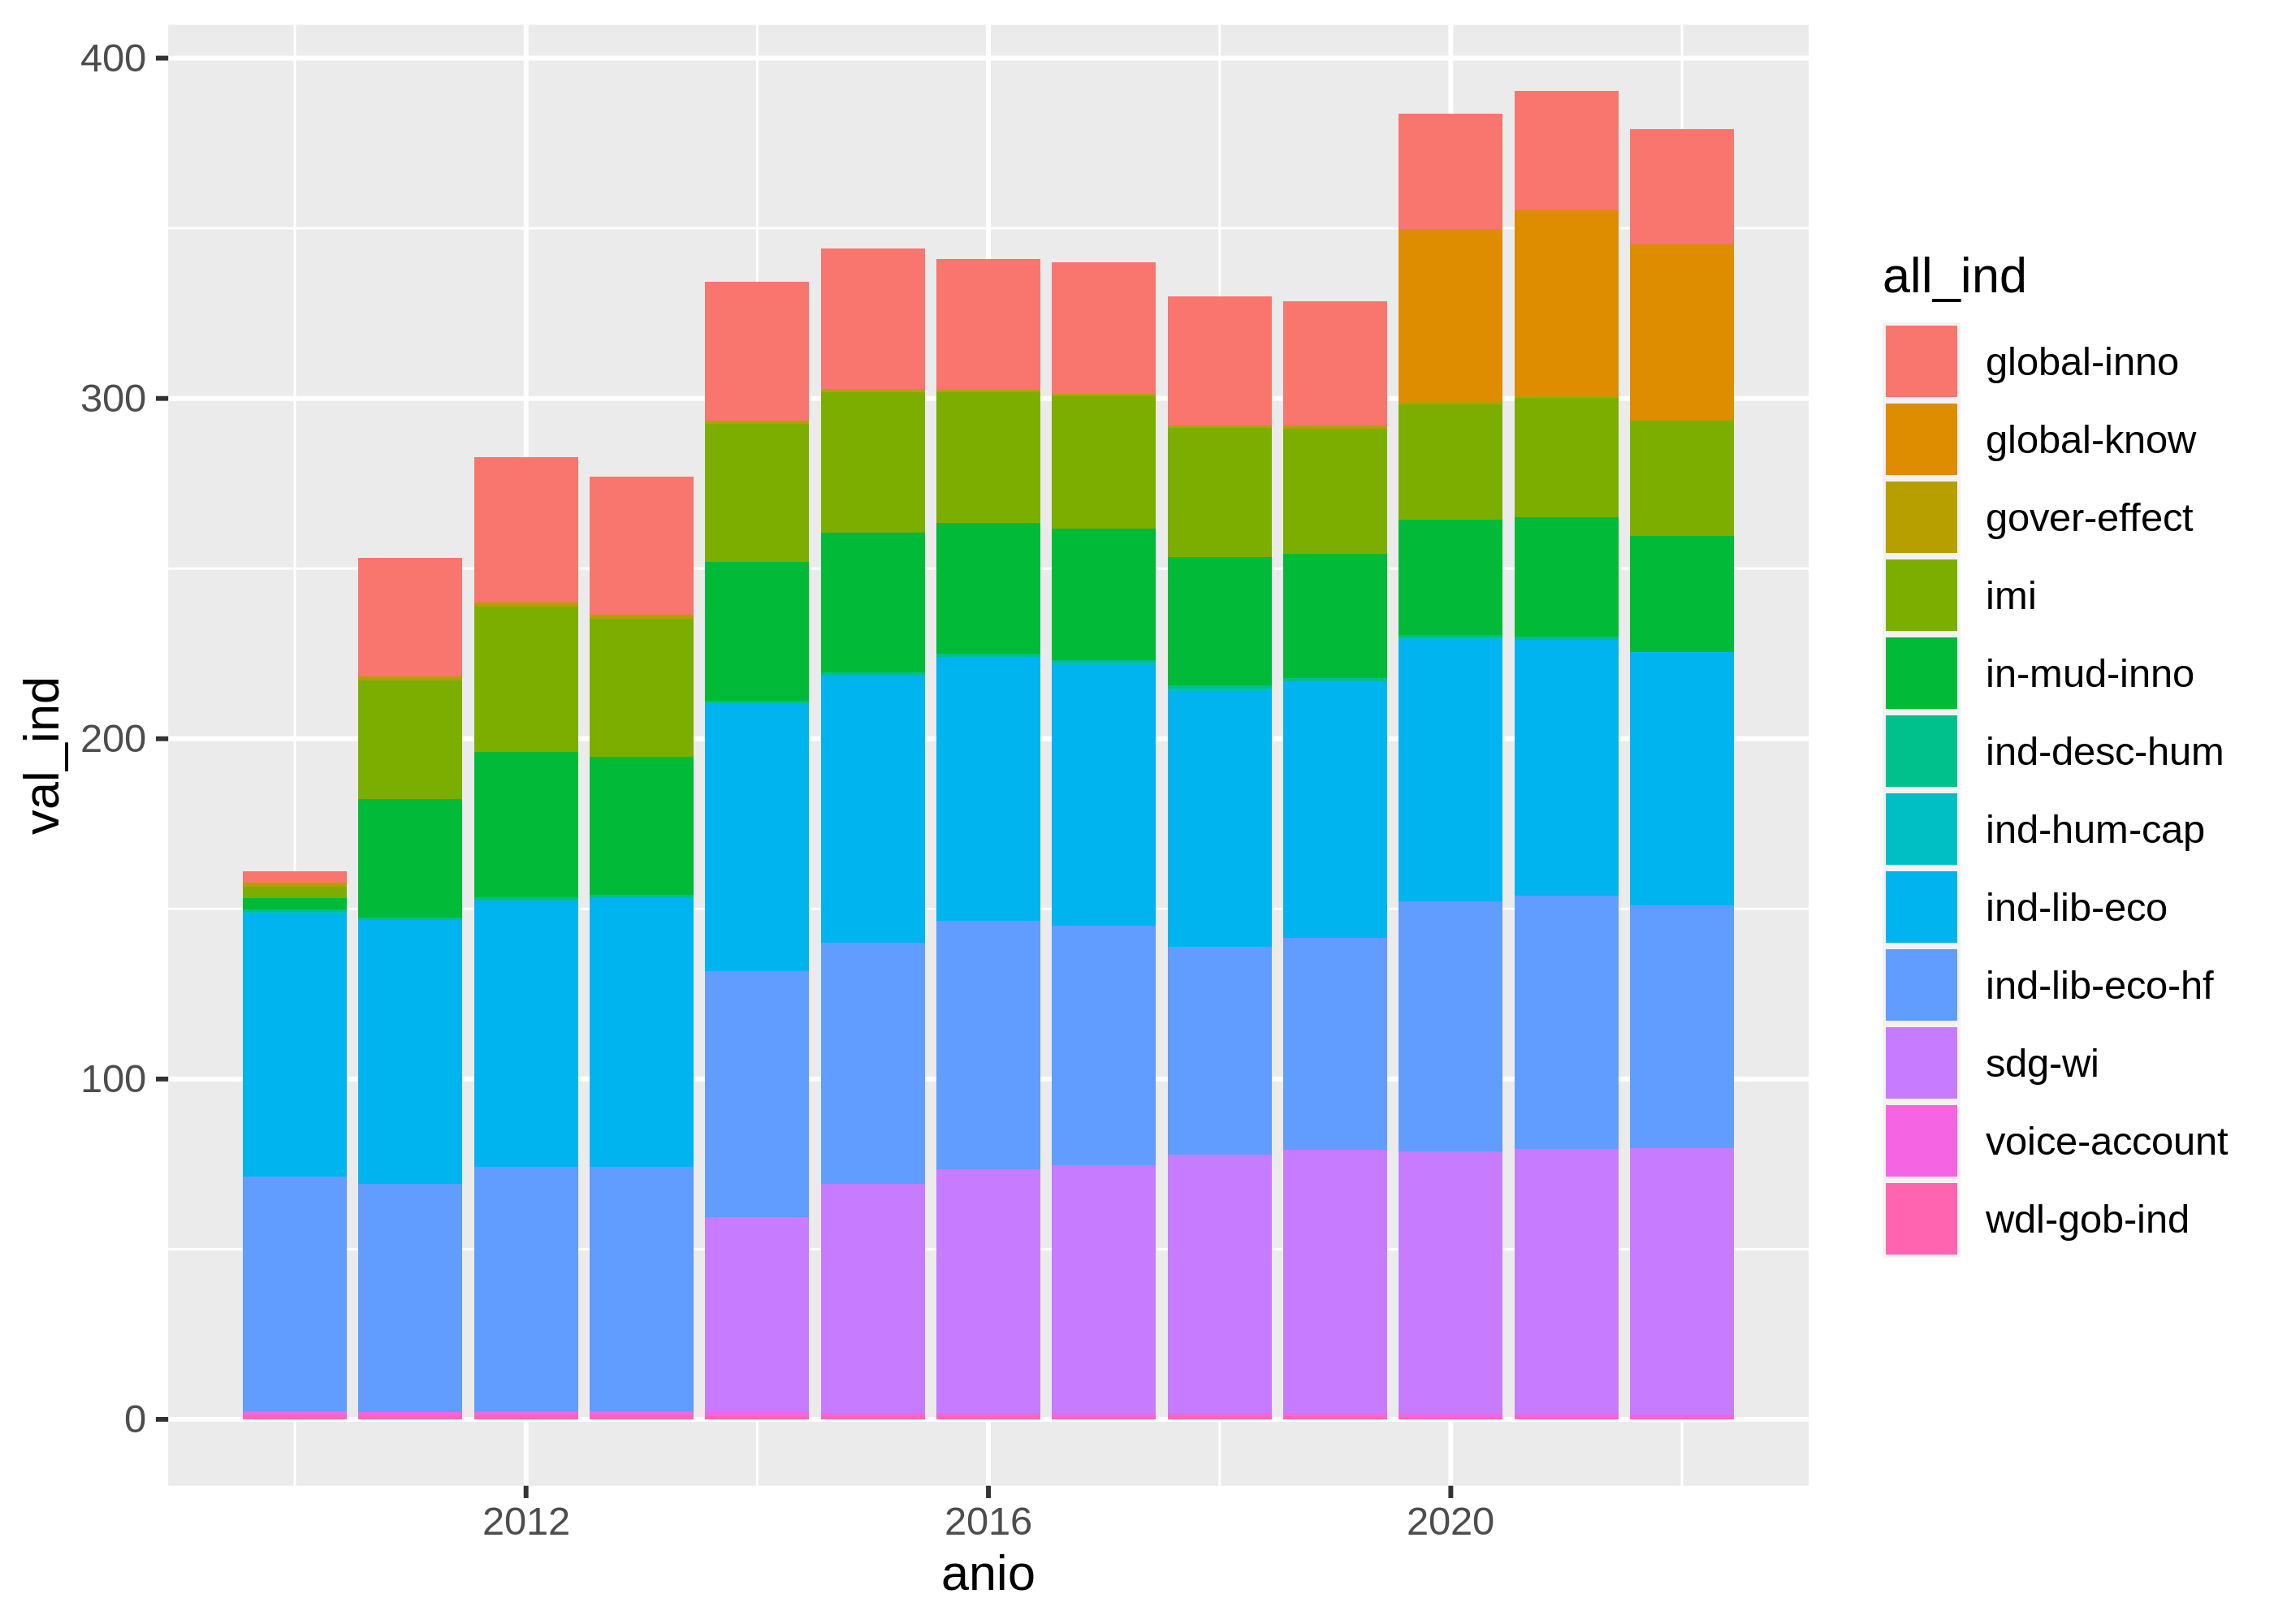

In [80]:
ggplot(chile, aes(x=anio,y=val_ind,fill=all_ind))+
  geom_bar(stat="identity")

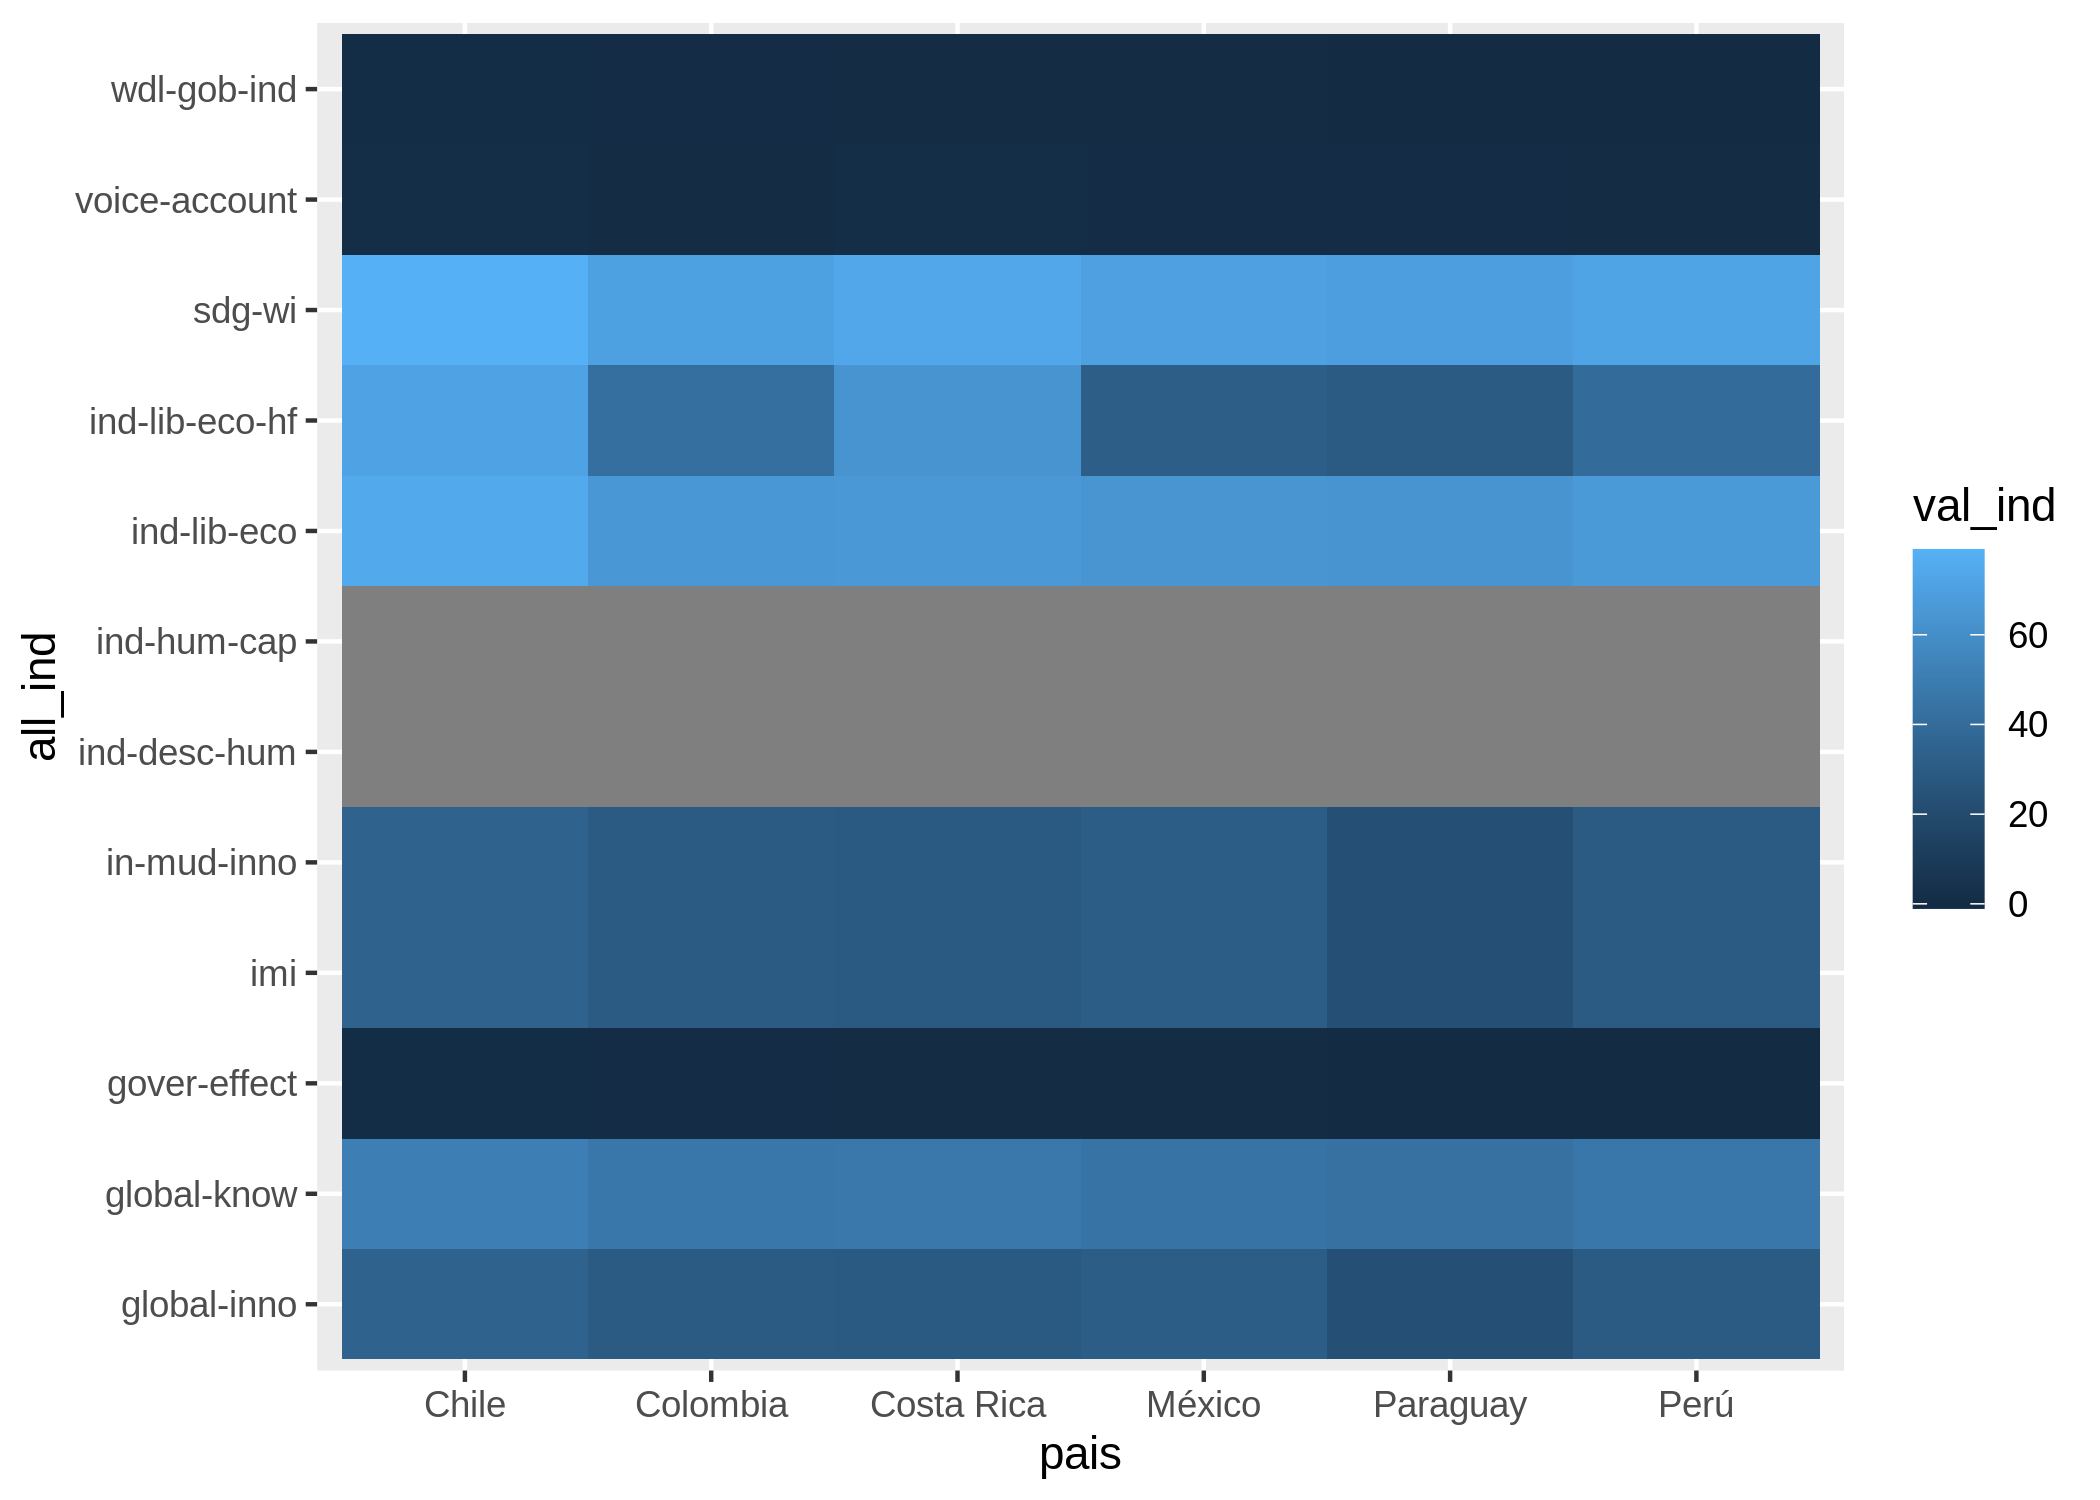

In [43]:
ggplot(data=indi_long, aes(x =pais,y=all_ind, fill = val_ind)) +
  geom_tile()

In [35]:
indicadores

id,sdg-wi,ind-desc-hum,wdl-gob-ind,ind-lib-eco,ind-lib-eco-hf,voice-account,gover-effect,imi,in-mud-inno,global-know,global-inno,ind-hum-cap,anio,pais
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,NA,0.813,1.1600,77.2,69.0,1.10,1.16,3.35,3.35,NA,3.35,0.6263600,2010,Chile
2,NA,0.817,1.1500,77.4,67.0,1.07,1.15,34.84,34.84,NA,34.84,NA,2011,Chile
3,NA,0.824,1.1800,78.3,72.0,1.08,1.18,42.70,42.70,NA,42.70,NA,2012,Chile
4,NA,0.836,1.1600,79.0,72.0,1.11,1.16,40.58,40.58,NA,40.58,NA,2013,Chile
5,57.30,0.841,1.0400,78.7,72.3,1.06,1.04,40.64,40.64,NA,40.64,NA,2014,Chile
6,67.20,0.846,0.9200,78.5,71.0,1.00,0.92,41.20,41.20,NA,41.20,NA,2015,Chile
7,71.60,0.850,0.8300,77.7,73.0,1.00,0.83,38.41,38.41,NA,38.41,NA,2016,Chile
8,72.80,0.853,0.8100,76.5,70.5,1.00,0.81,38.70,38.70,NA,38.70,0.6740000,2017,Chile
9,75.80,0.856,0.9100,75.2,61.2,1.03,0.91,37.79,37.79,NA,37.79,0.6652651,2018,Chile


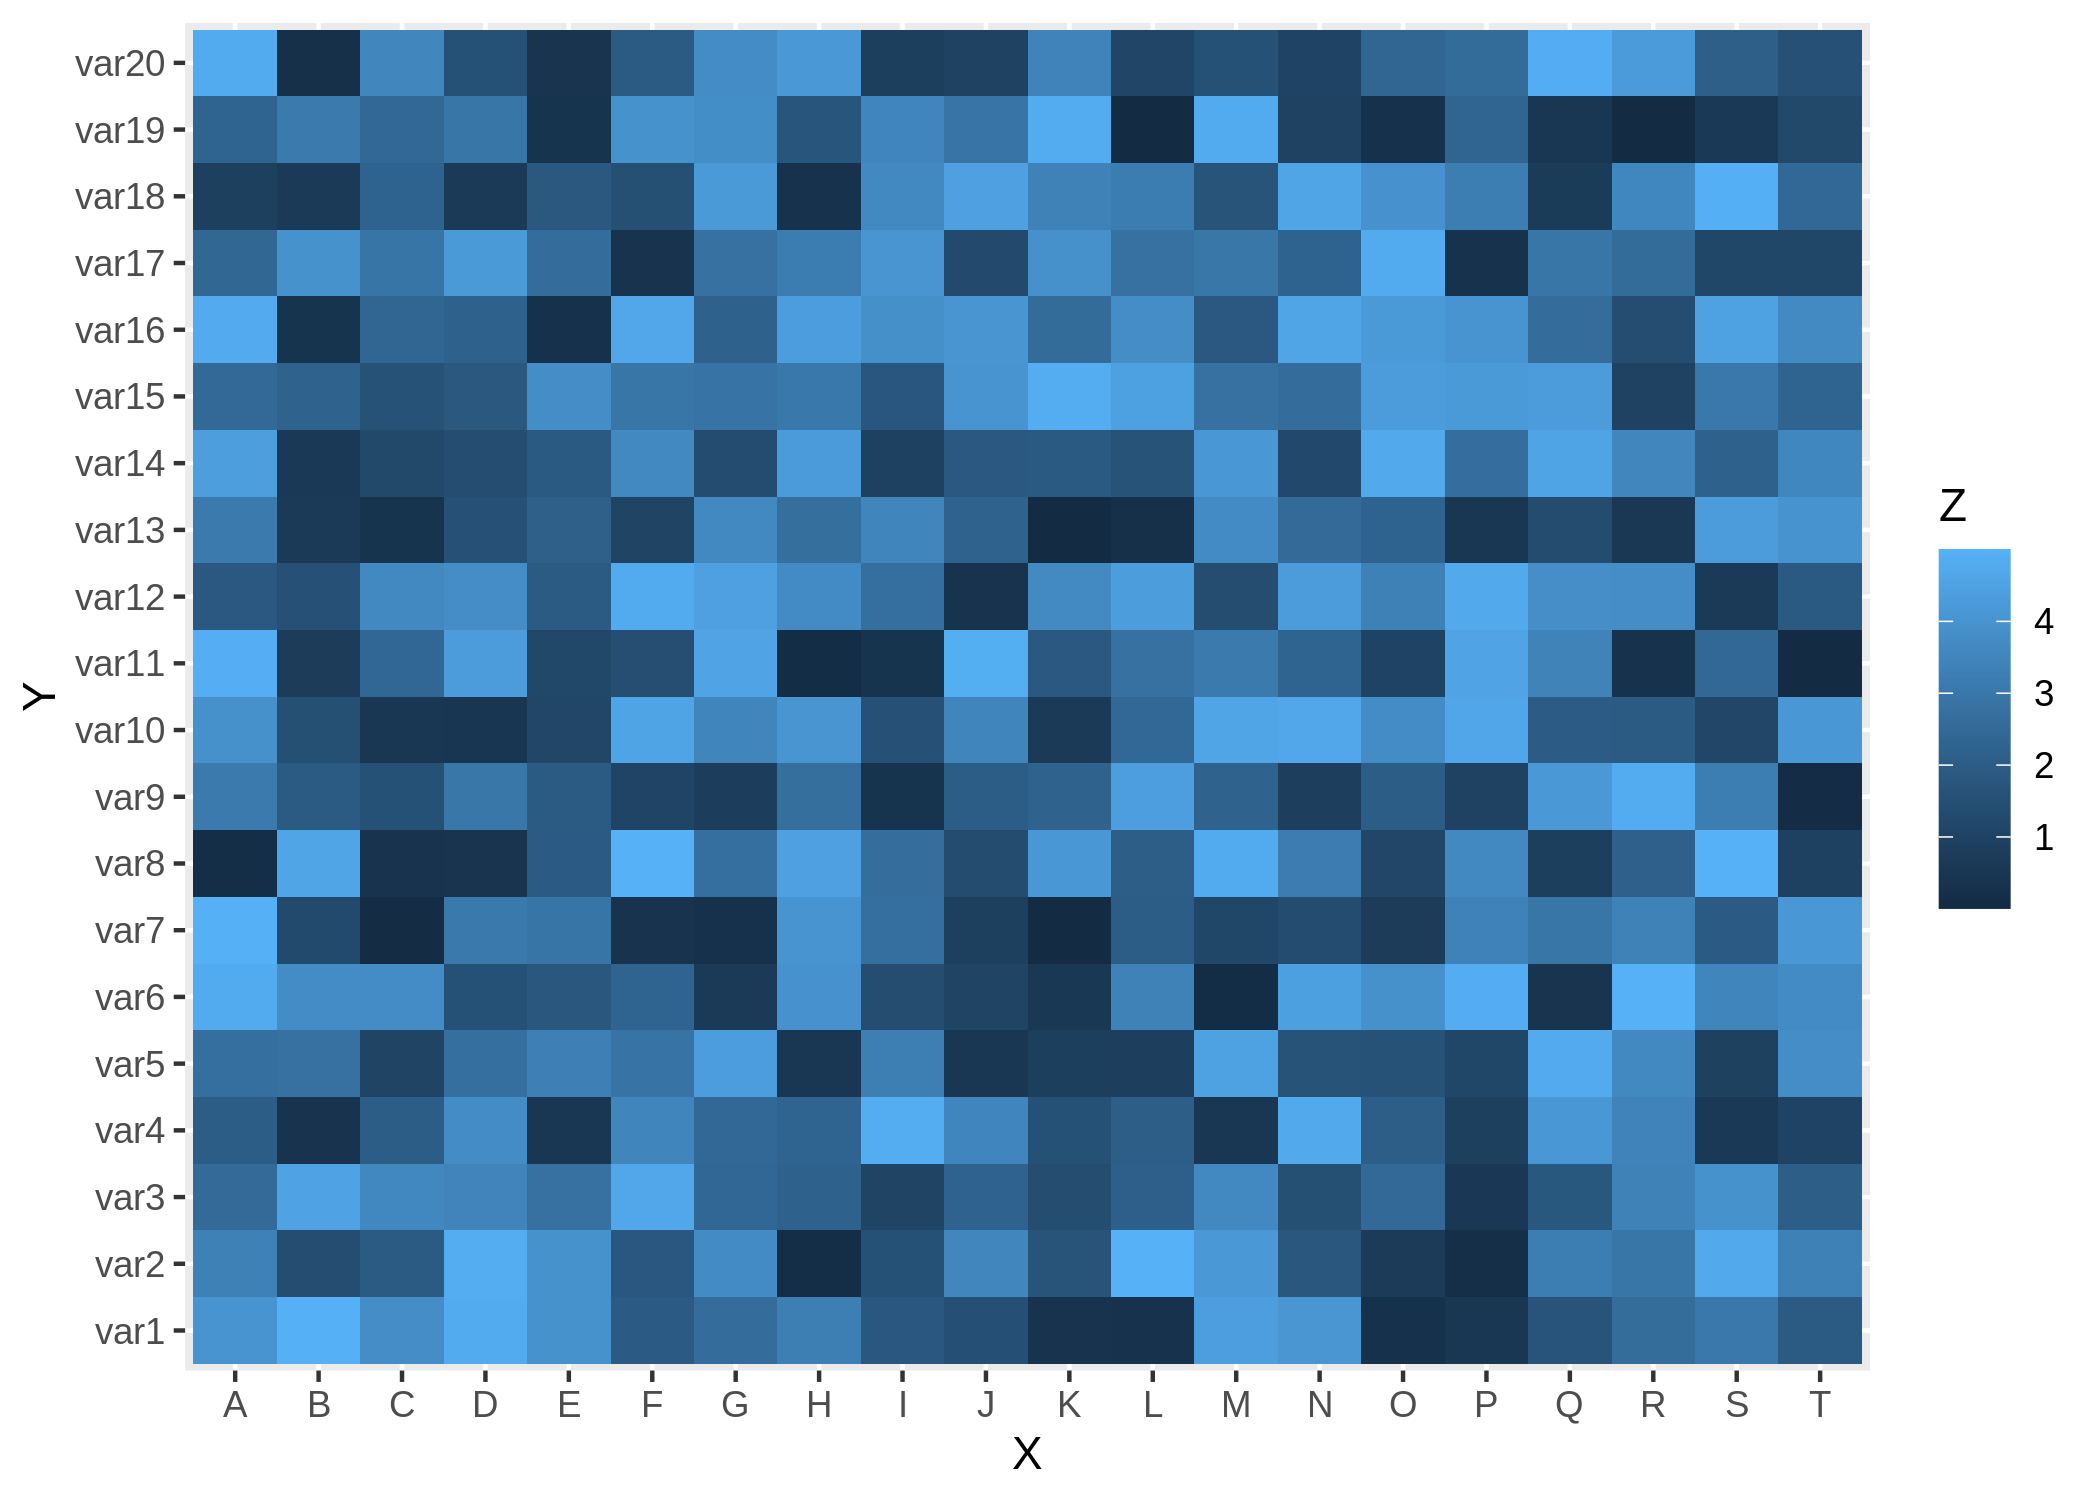

In [33]:
# Dummy data
x <- LETTERS[1:20]
y <- paste0("var", seq(1,20))
data <- expand.grid(X=x, Y=y)
data$Z <- runif(400, 0, 5)

# Heatmap
ggplot(data, aes(X, Y, fill= Z)) +
  geom_tile()

In [34]:
data

X,Y,Z
<fct>,<fct>,<dbl>
A,var1,3.9961077
B,var1,4.9681176
C,var1,3.7701731
D,var1,4.7894647
E,var1,3.9229912
F,var1,1.9357248
G,var1,2.5836116
H,var1,3.2362529
I,var1,1.8016147


In [32]:
indicadores

id,sdg-wi,ind-desc-hum,wdl-gob-ind,ind-lib-eco,ind-lib-eco-hf,voice-account,gover-effect,imi,in-mud-inno,global-know,global-inno,ind-hum-cap,anio,pais
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,NA,0.813,1.1600,77.2,69.0,1.10,1.16,3.35,3.35,NA,3.35,0.6263600,2010,Chile
2,NA,0.817,1.1500,77.4,67.0,1.07,1.15,34.84,34.84,NA,34.84,NA,2011,Chile
3,NA,0.824,1.1800,78.3,72.0,1.08,1.18,42.70,42.70,NA,42.70,NA,2012,Chile
4,NA,0.836,1.1600,79.0,72.0,1.11,1.16,40.58,40.58,NA,40.58,NA,2013,Chile
5,57.30,0.841,1.0400,78.7,72.3,1.06,1.04,40.64,40.64,NA,40.64,NA,2014,Chile
6,67.20,0.846,0.9200,78.5,71.0,1.00,0.92,41.20,41.20,NA,41.20,NA,2015,Chile
7,71.60,0.850,0.8300,77.7,73.0,1.00,0.83,38.41,38.41,NA,38.41,NA,2016,Chile
8,72.80,0.853,0.8100,76.5,70.5,1.00,0.81,38.70,38.70,NA,38.70,0.6740000,2017,Chile
9,75.80,0.856,0.9100,75.2,61.2,1.03,0.91,37.79,37.79,NA,37.79,0.6652651,2018,Chile


In [30]:
data

math,english,biology,music,R-coding,data-viz,french,physic,statistic,sport
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,20,20,20,20,20,20,20,20,20
0,0,0,0,0,0,0,0,0,0
4,9,5,9,20,5,14,20,5,6


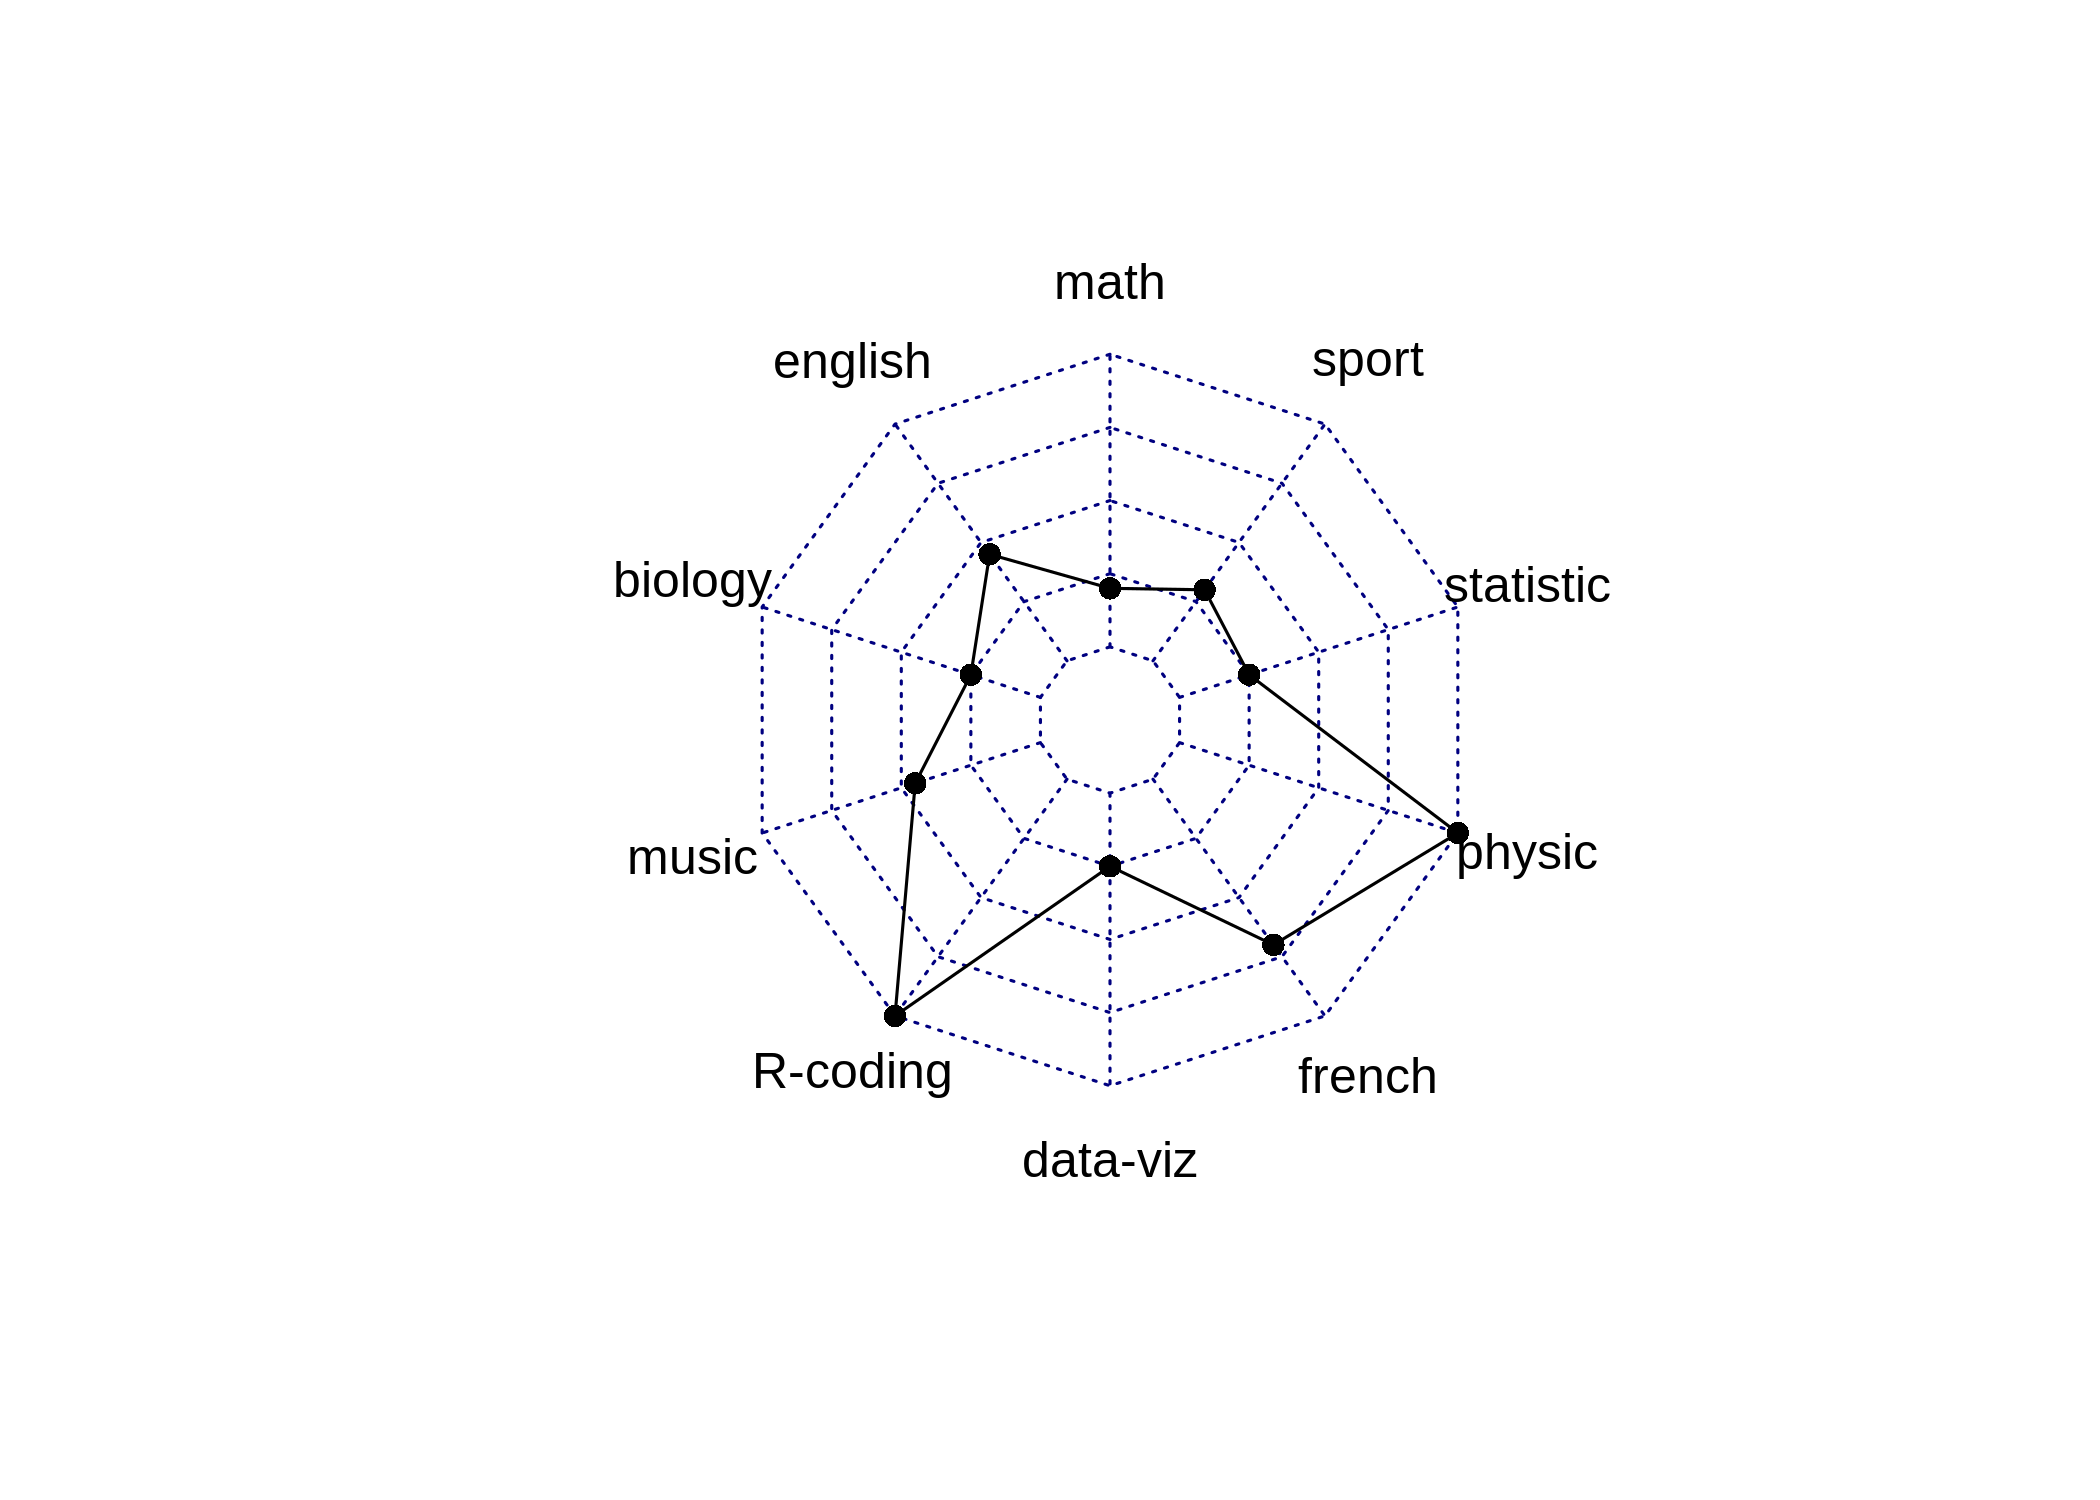

In [31]:
radarchart(data)

In [26]:
install.packages("fmsb")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
#indicadores

In [10]:
indicadores$anio <- as.integer(indicadores$anio)

In [196]:
indicadores2 <- read_csv('sample_data/eje1_estado_democratico_derecho.csv')

New names:
• `` -> `...9`
• `` -> `...10`
Rows: 78 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): pais
dbl (7): año, indc_lib_prensa, indc_lib_econ, indc_civil_part, ind_integri_g...
lgl (2): ...9, ...10

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [198]:
summary(indicadores2)

     pais                año       indc_lib_prensa indc_lib_econ  
 Length:78          Min.   :2010   Min.   :-2.25   Min.   :61.10  
 Class :character   1st Qu.:2013   1st Qu.:54.66   1st Qu.:65.12  
 Mode  :character   Median :2016   Median :66.49   Median :67.35  
                    Mean   :2016   Mean   :62.29   Mean   :67.92  
                    3rd Qu.:2019   3rd Qu.:72.67   3rd Qu.:68.90  
                    Max.   :2022   Max.   :91.24   Max.   :79.00  
                                   NA's   :6                      
 indc_civil_part  ind_integri_guber  ind_voic_acc      ind_gov_eff      
 Min.   :0.3970   Min.   :20.50     Min.   :-0.1300   Min.   :-1.00000  
 1st Qu.:0.6395   1st Qu.:32.30     1st Qu.:-0.0075   1st Qu.:-0.29000  
 Median :0.7430   Median :36.85     Median : 0.1350   Median :-0.04500  
 Mean   :0.7399   Mean   :42.72     Mean   : 0.3865   Mean   : 0.01513  
 3rd Qu.:0.8093   3rd Qu.:53.00     3rd Qu.: 1.0000   3rd Qu.: 0.30000  
 Max.   :0.9500   Max.   :

In [ ]:
indicadores[,]